# Next 3 minutes (approx.) of your presentation -- Core Analysis
If you used ML (regression, classification, or something else); mention mainly WHICH one(s).
You may now briefly CLARIFY why and how the ML problem(s) aim(s) to solve your objective.
How did you apply ML technique(s) to SOLVE your problem? Which model(s), how and why?
Did you only use tools and techniques learned in this course? What ELSE did you learn / try?

#### Import libriaries and framework

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Prepare the data

In [63]:
# Load the data from the CSV file into a DataFrame
data = pd.read_csv('datasets/listings_preprocessed.csv')

# Separate the input features (X) and target variable (y)
X = data.drop('price', axis=1)
y = data['price']

# Filter out non-numeric columns
numeric_columns = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# One-hot encode categorical features
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the columns of the training and testing sets
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Fill missing values in the training set with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)

# Fill missing values in the test set with the mean of the corresponding columns in the training set
X_test.fillna(X_train.mean(), inplace=True)

# Fill remaining NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

#### Predict the data

In [64]:
# Fit a linear regression model to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the prices for the test data
y_pred = lr.predict(X_test)

#### Display the coefficients and performance metrics

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Print the coefficients and the intercept
print("Coefficients:\n", lr.coef_)
print("Intercept:", lr.intercept_)

# Calculate and print the R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate and print the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Coefficients:
 [ 2.86132764e-18  8.50378113e-11  5.48835373e-09  1.03920853e-02
  2.36189917e-02  4.25541639e-02  1.03121095e-01  1.73333937e-06
 -6.38794986e-06  4.63686634e-04  0.00000000e+00 -2.00306442e-05
  6.74402147e-04 -3.14870269e-01  2.28255064e-02 -3.17725388e-01
 -3.40932802e-01 -9.05467705e-03 -8.84002904e-03 -3.40913822e-01
 -9.42398196e-03  0.00000000e+00 -2.63131693e-02 -5.28151114e-02
 -8.03464689e-02 -4.39998982e-01 -1.04247020e-02  1.62250311e-03
 -1.42601626e-04  2.00879652e-04  1.22505201e-04  2.25978538e-04
 -4.78568703e-05 -4.04180090e-05  1.00743334e-04 -2.43208819e-05
  1.85169057e-02  2.58313651e-02 -9.82753727e-03  1.28926529e-04
 -9.83388297e-04  1.83562523e-02 -1.13171634e-04 -1.24779532e-04
  1.78873845e-04  2.71929056e-04  2.40320046e-04  1.81020326e-06
 -1.52991910e-05 -3.05018366e-04 -1.59391748e-06  4.48812028e-05
 -5.86879376e-06  1.05588351e-06 -5.07635799e-06 -8.47507509e-06
 -8.28480529e-05  9.43205756e-06 -3.43422565e-05  9.56619378e-06
 -1.529386

#### Plot the regression model

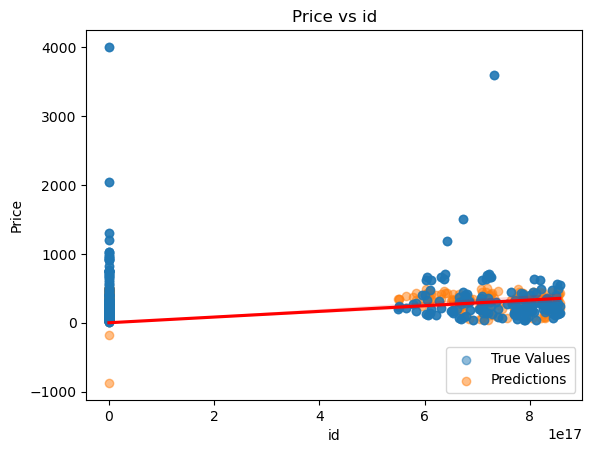

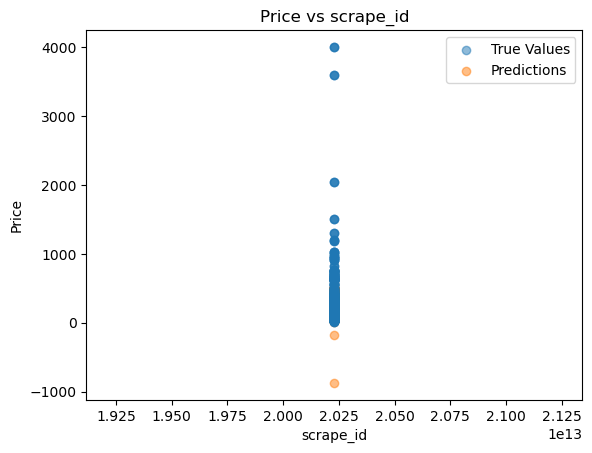

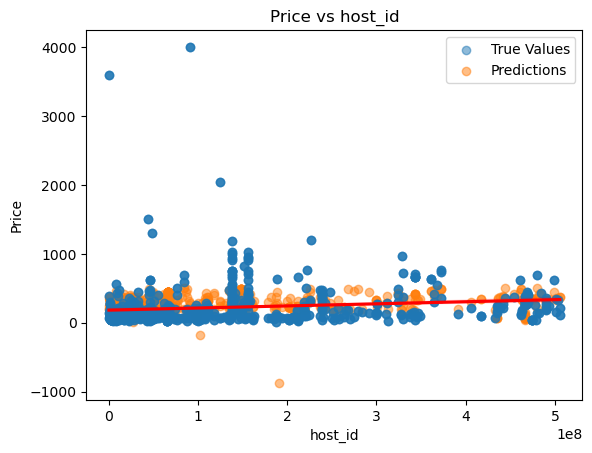

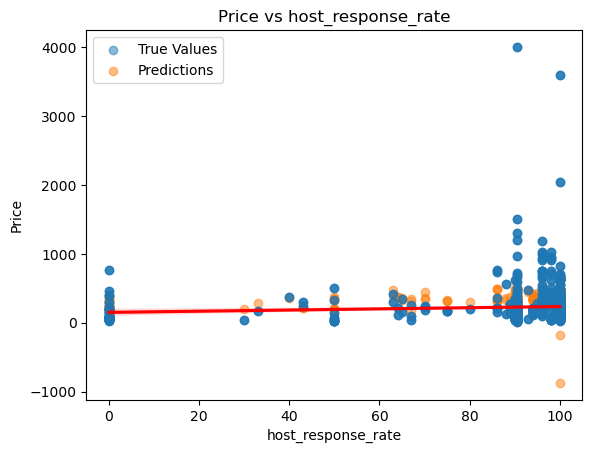

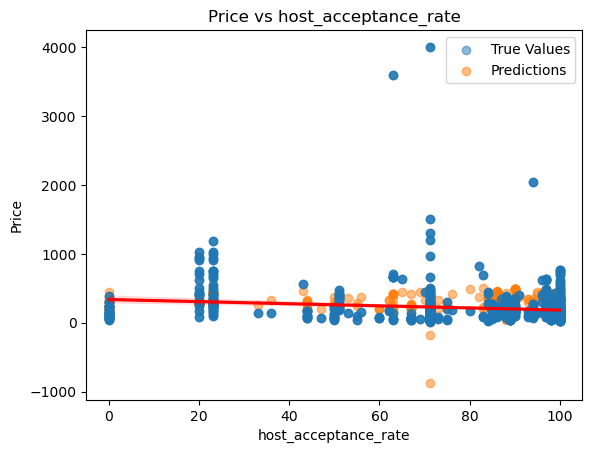

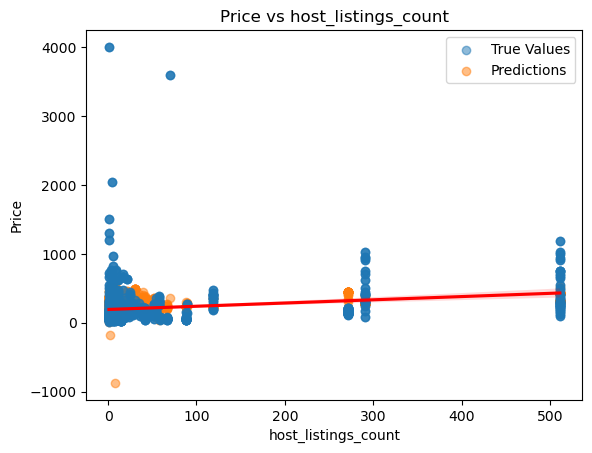

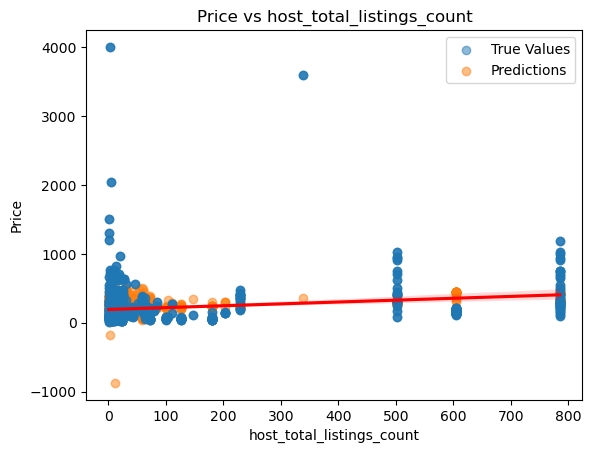

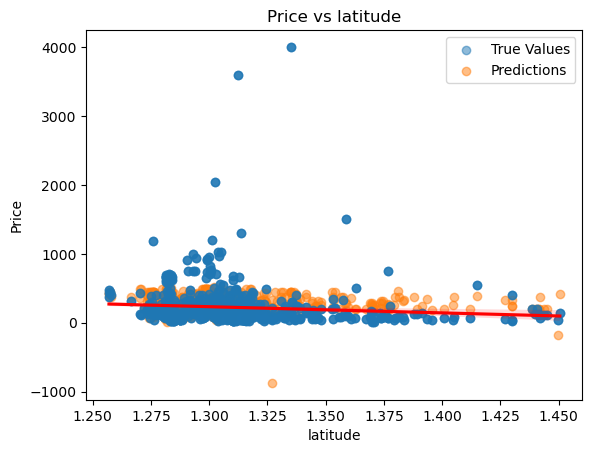

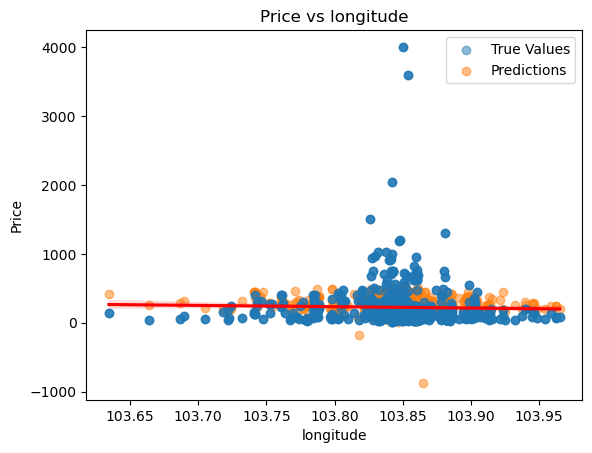

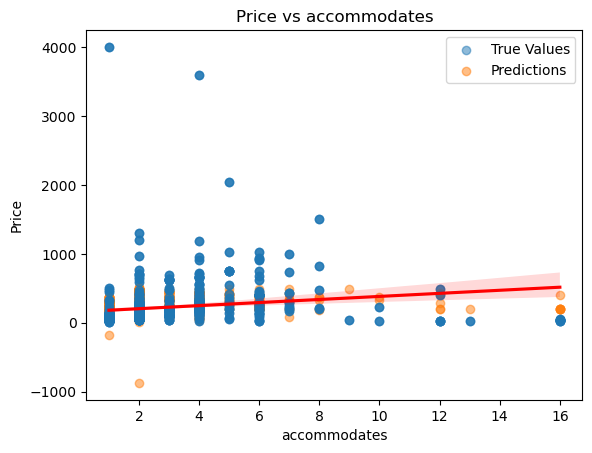

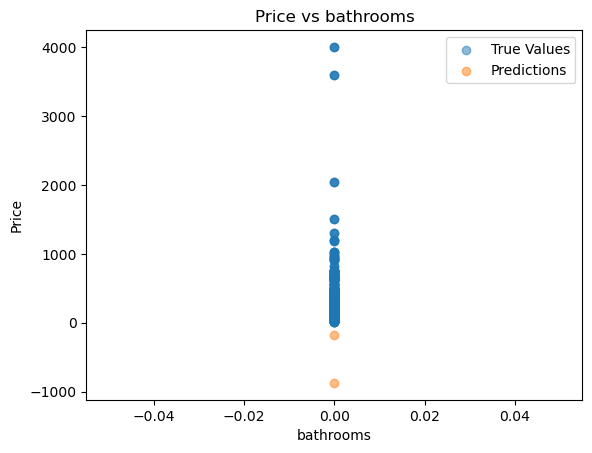

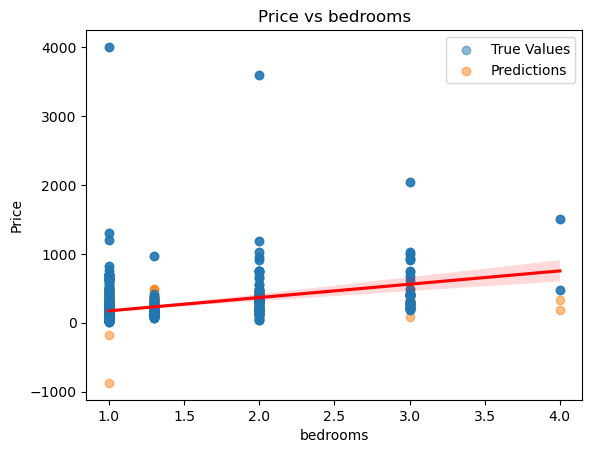

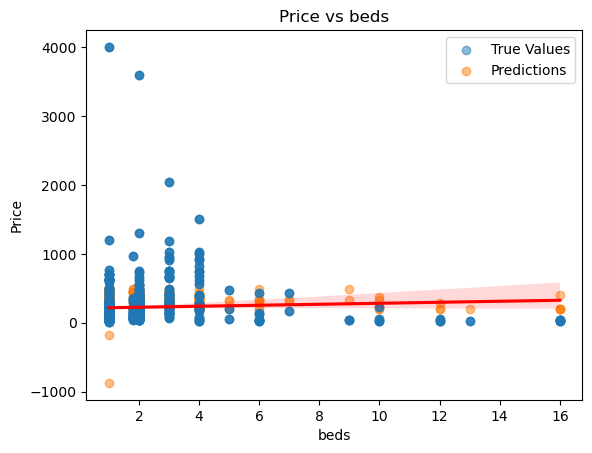

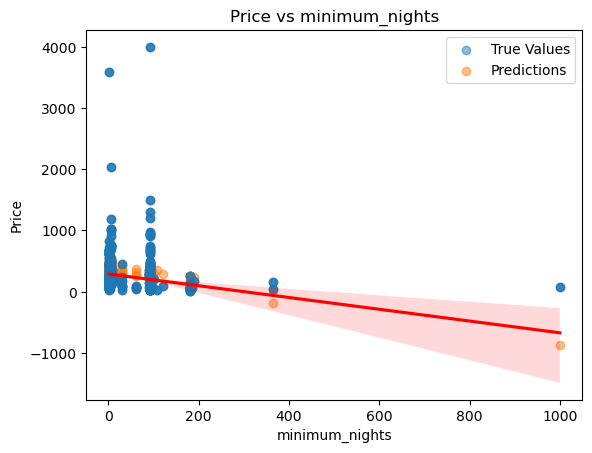

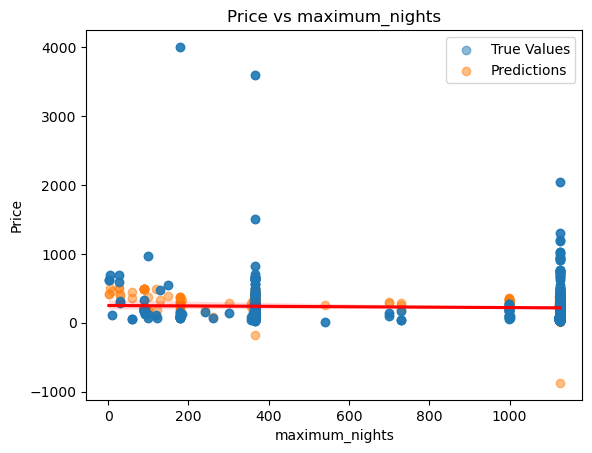

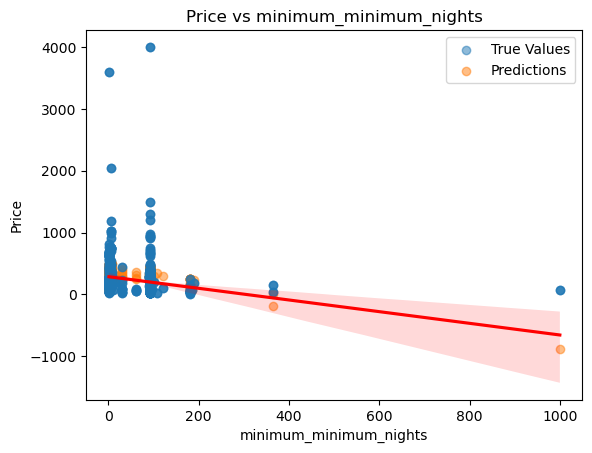

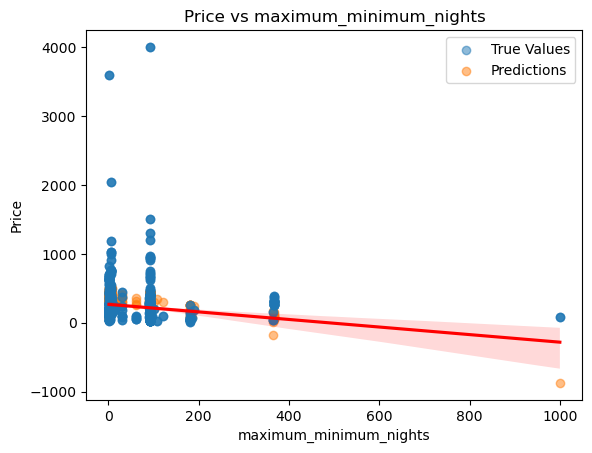

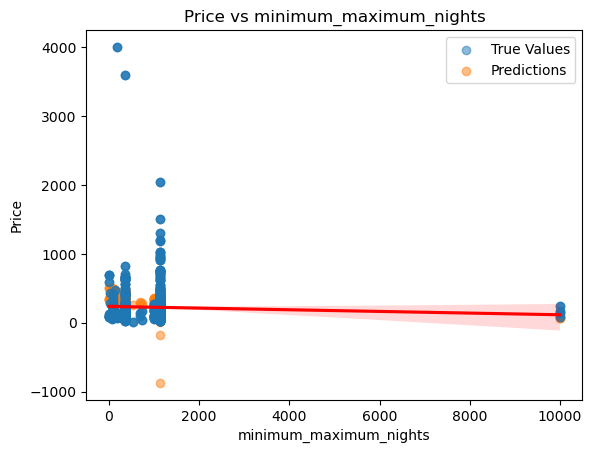

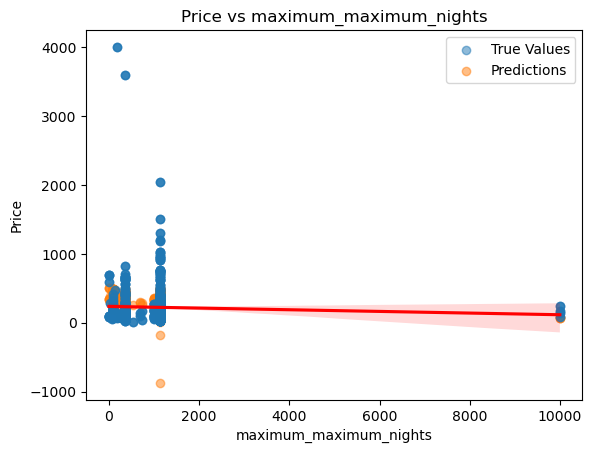

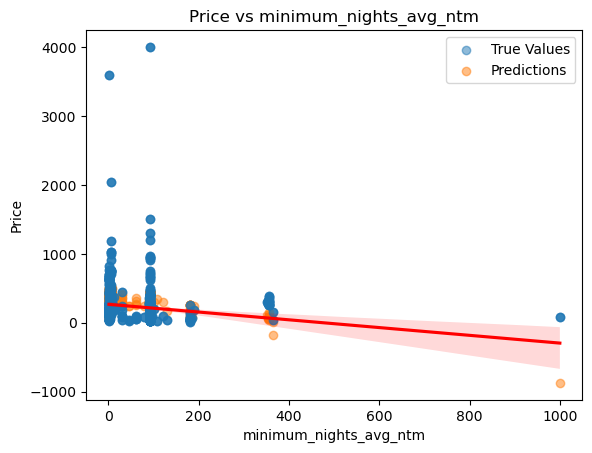

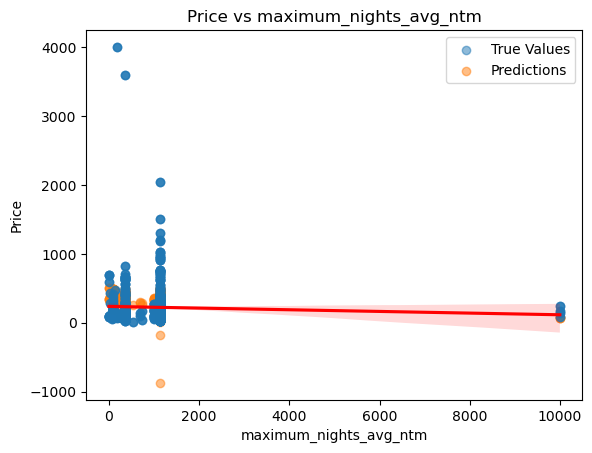

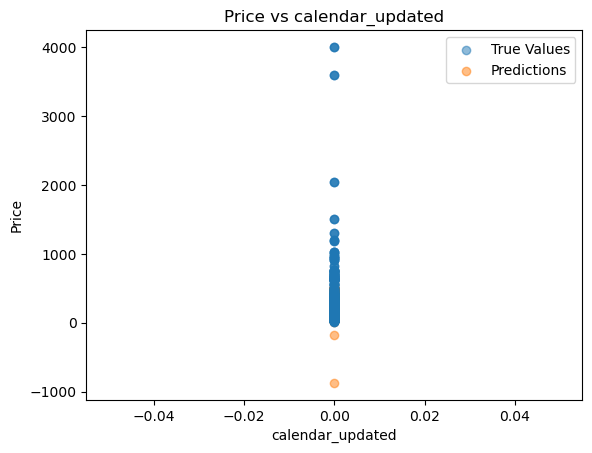

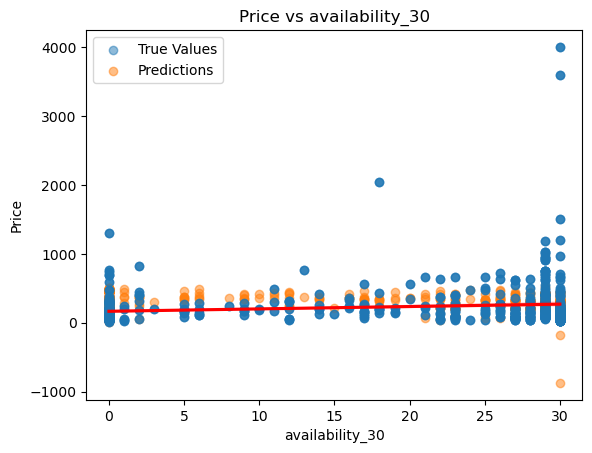

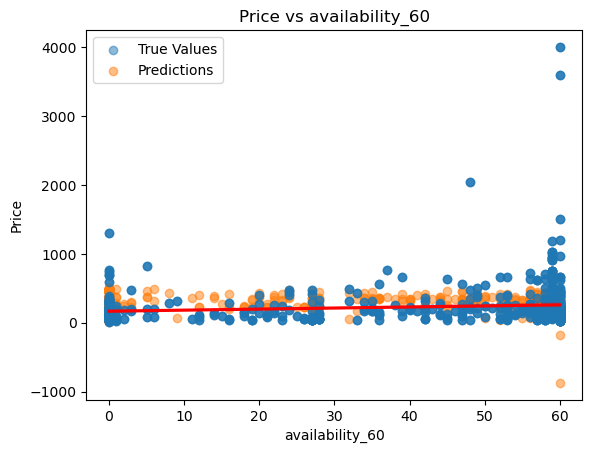

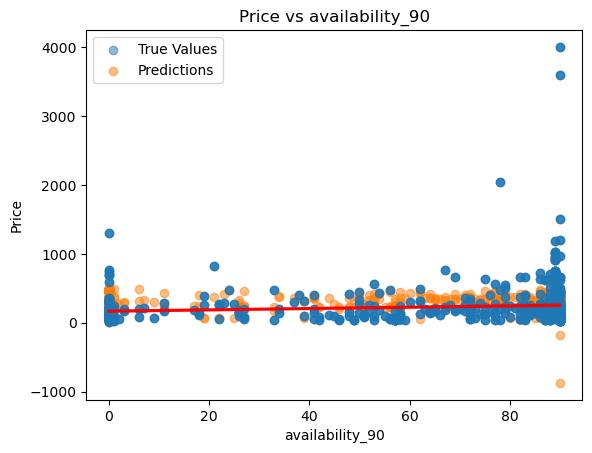

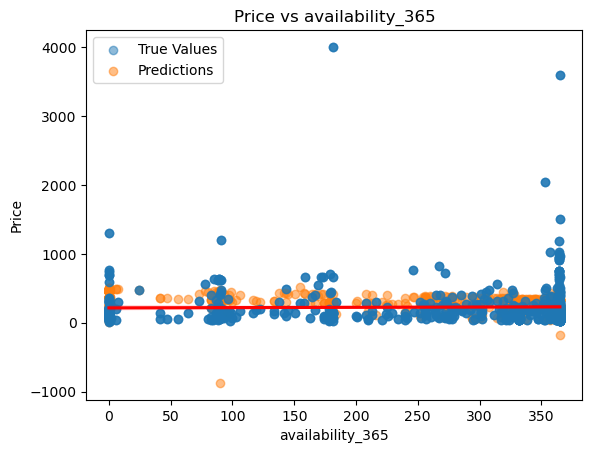

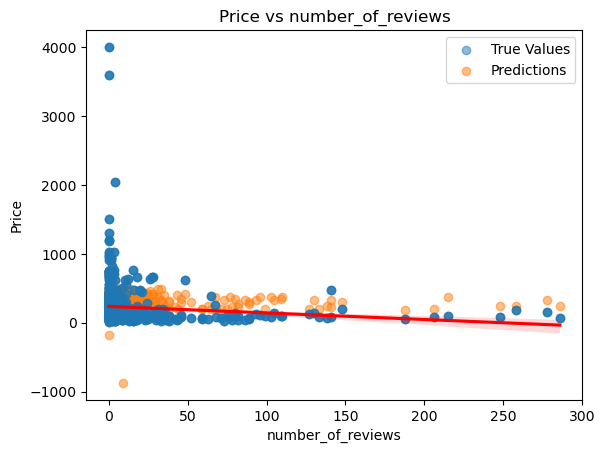

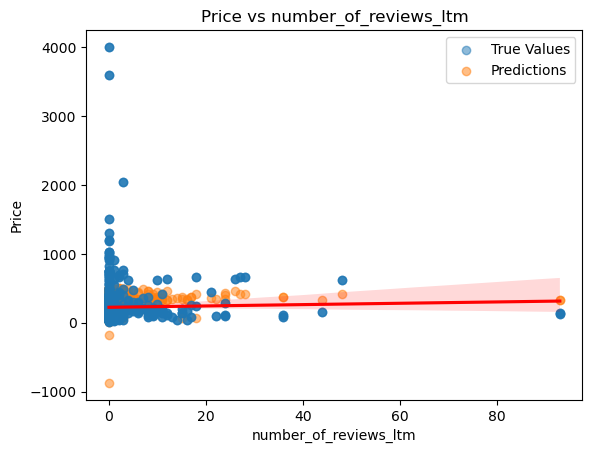

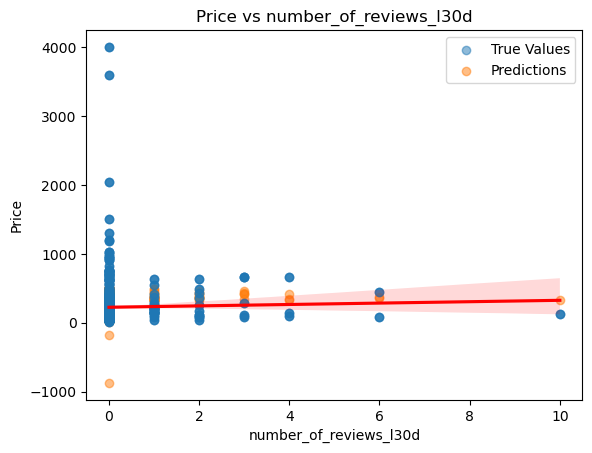

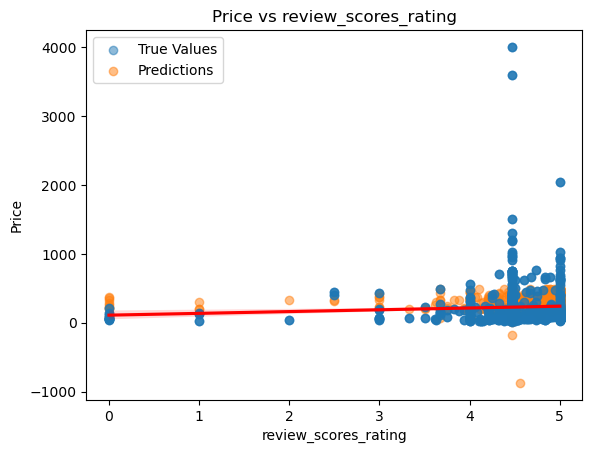

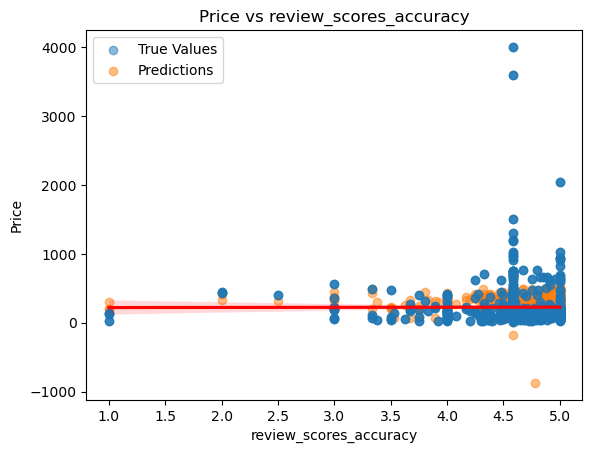

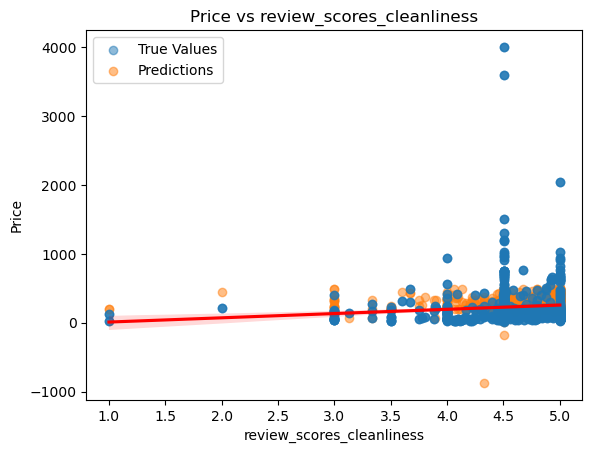

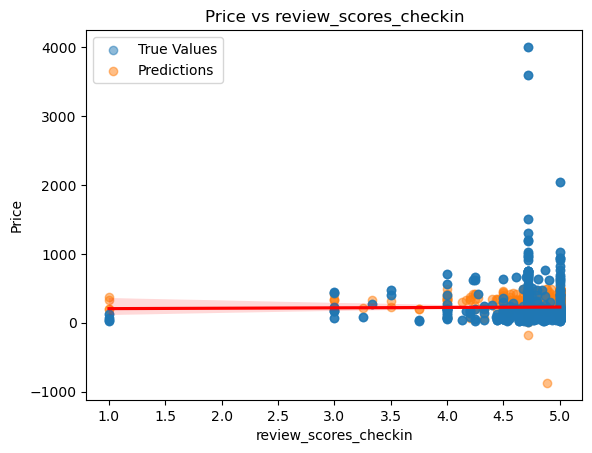

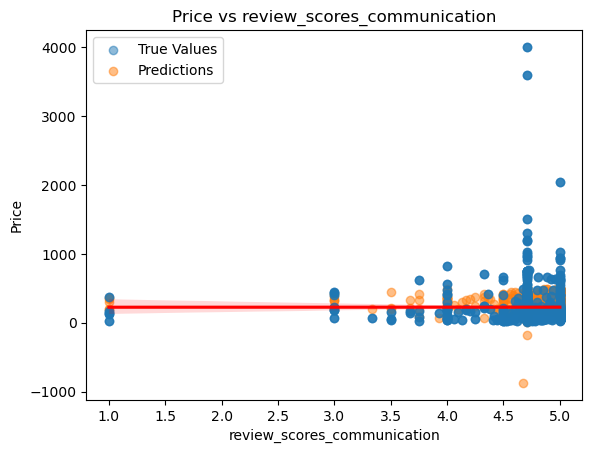

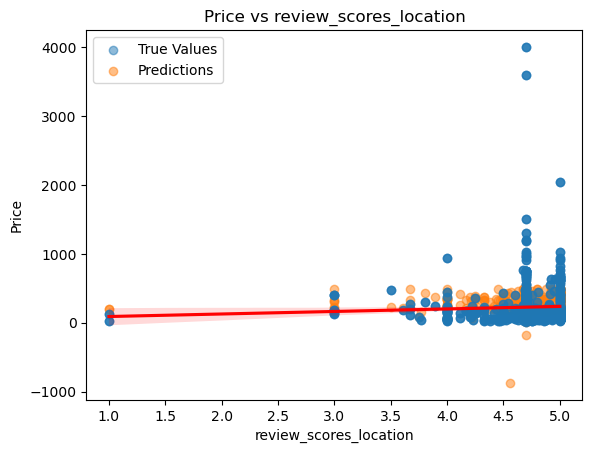

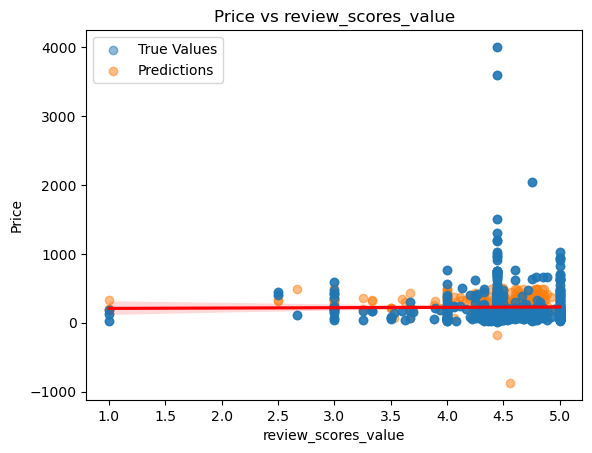

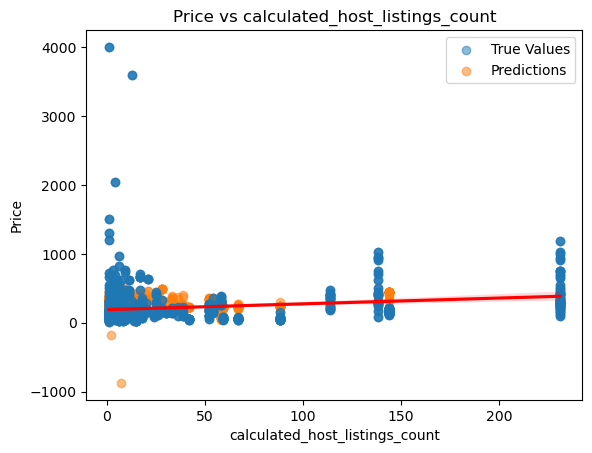

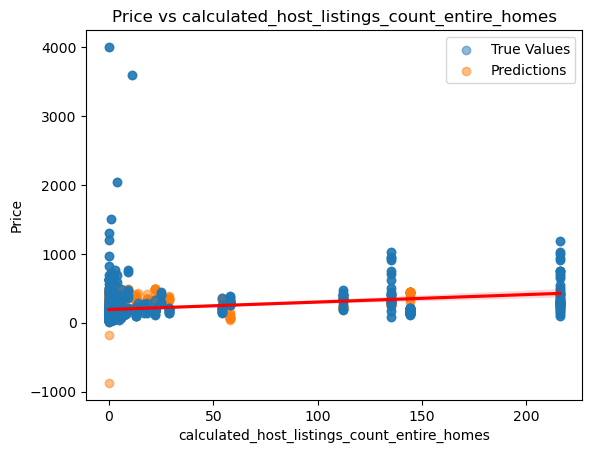

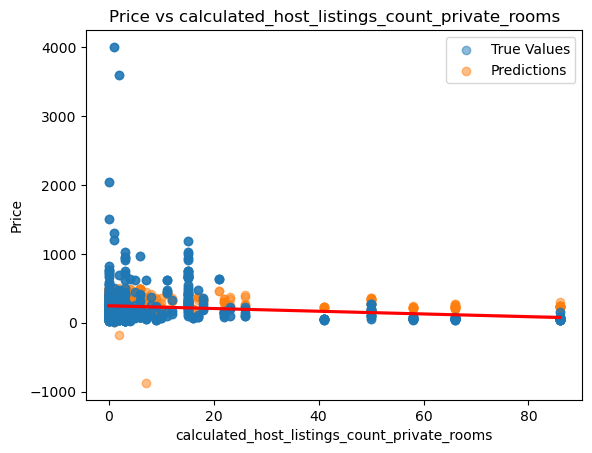

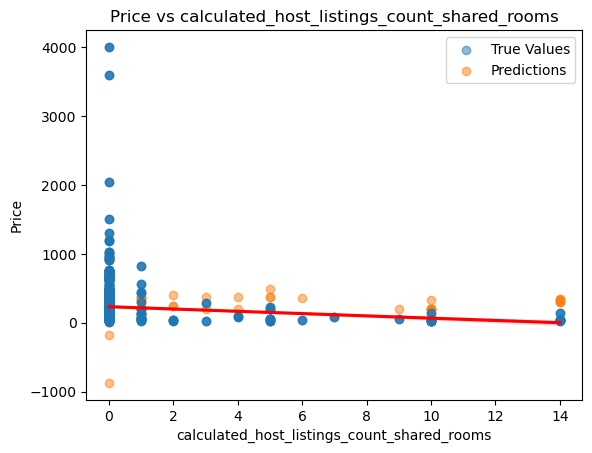

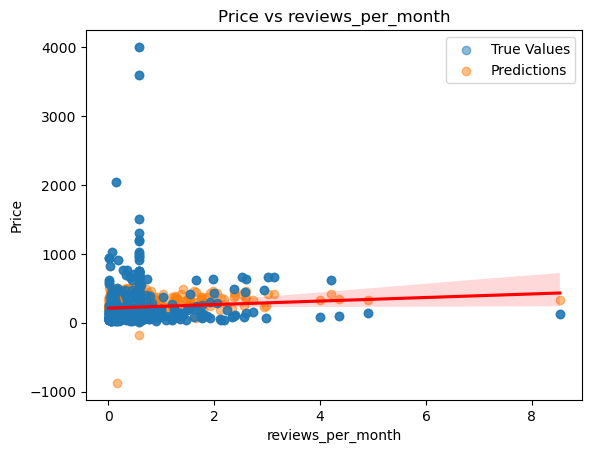

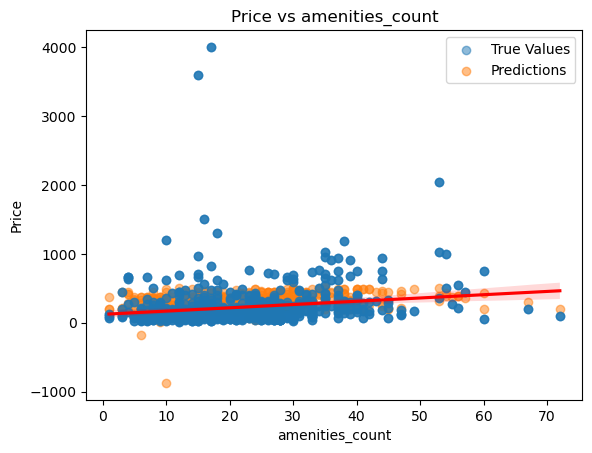

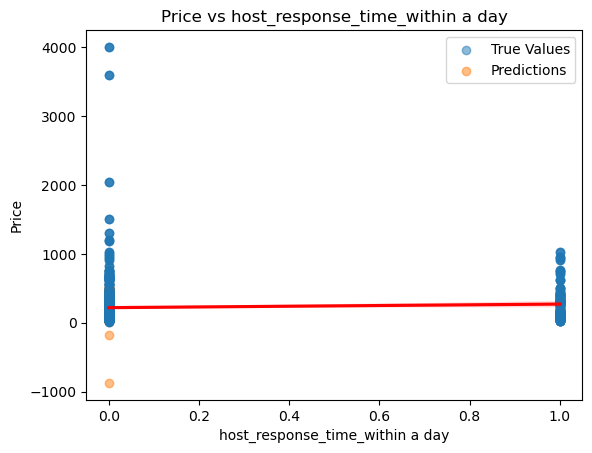

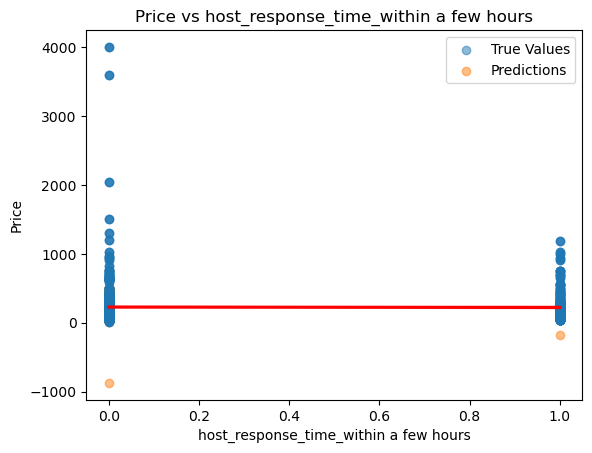

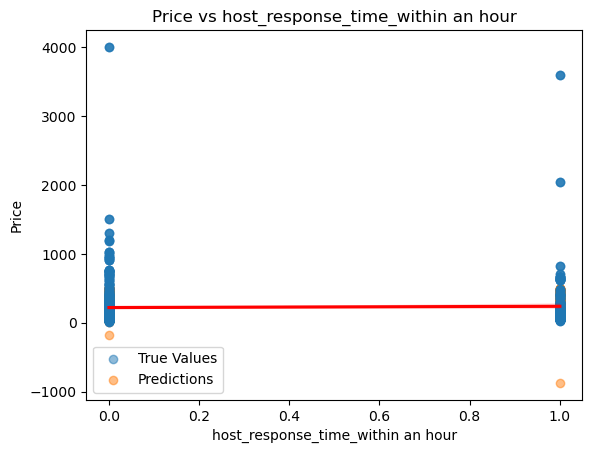

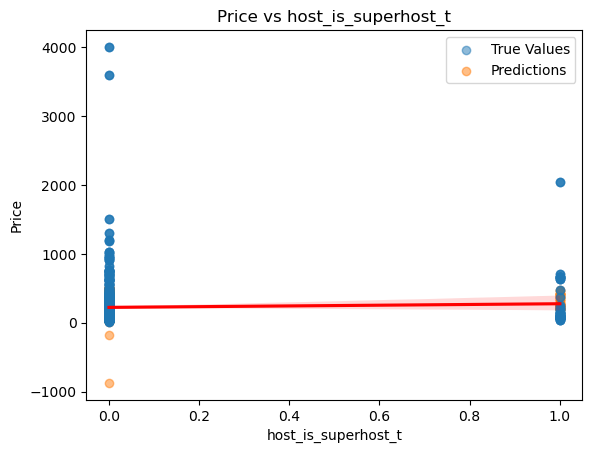

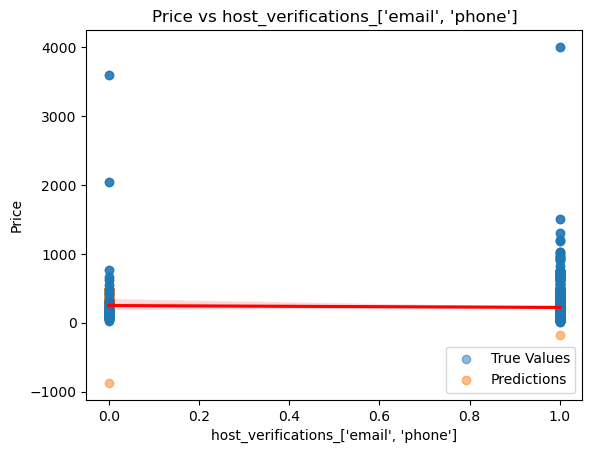

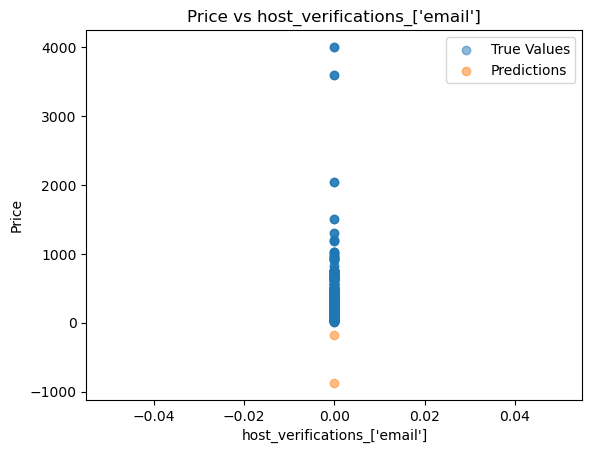

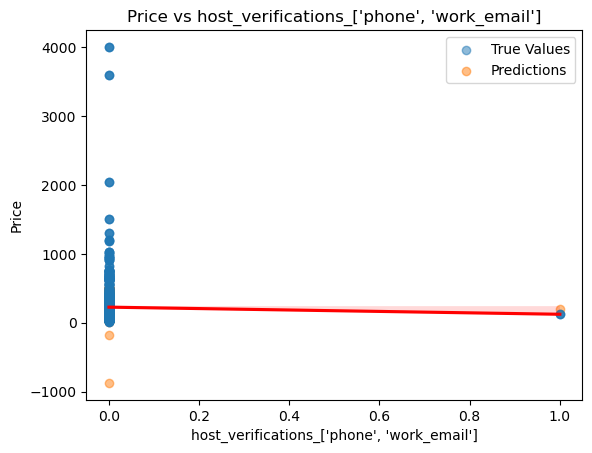

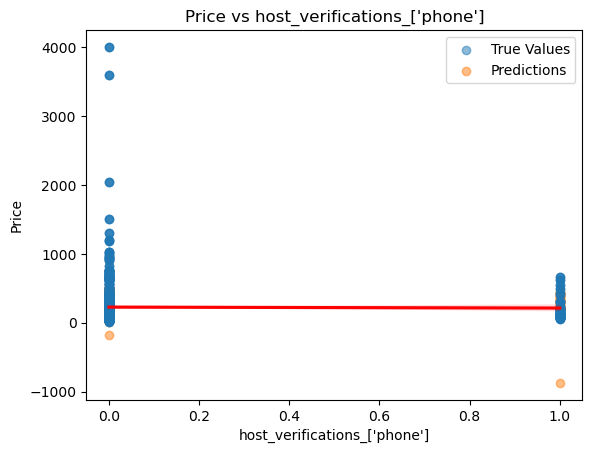

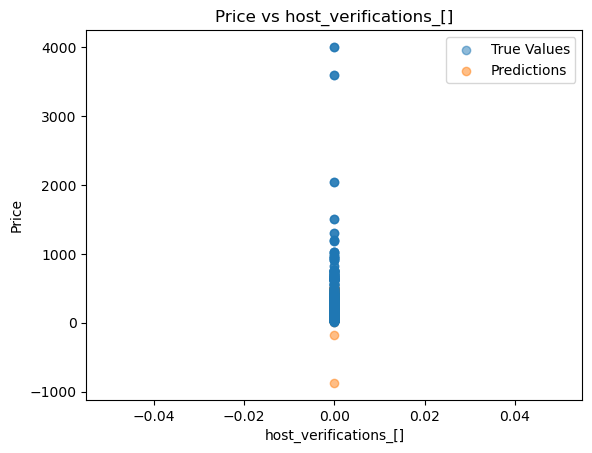

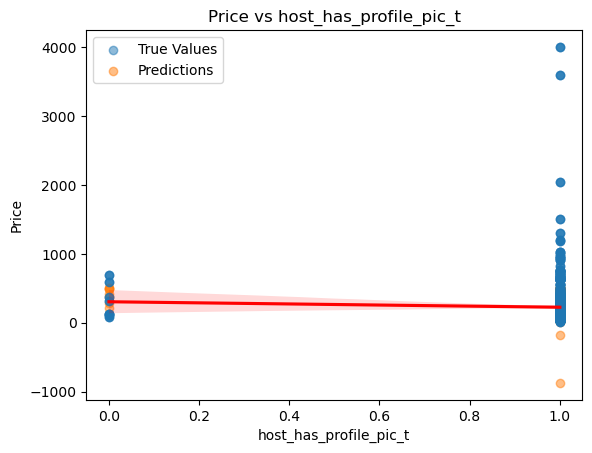

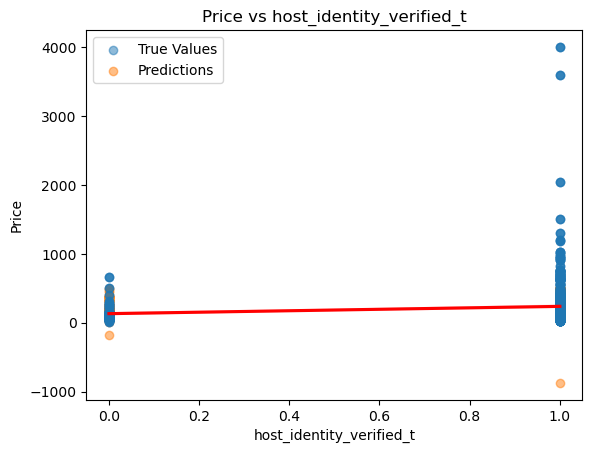

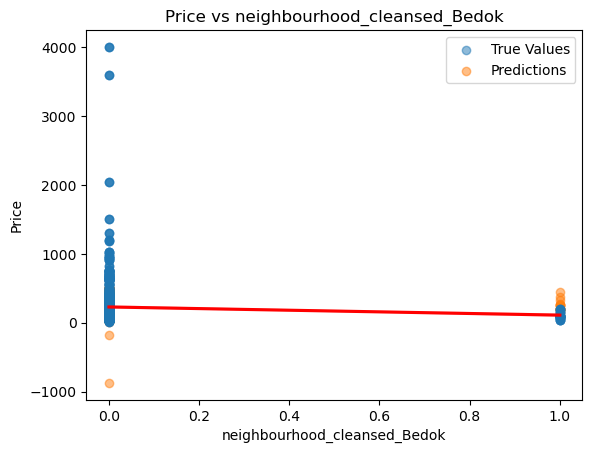

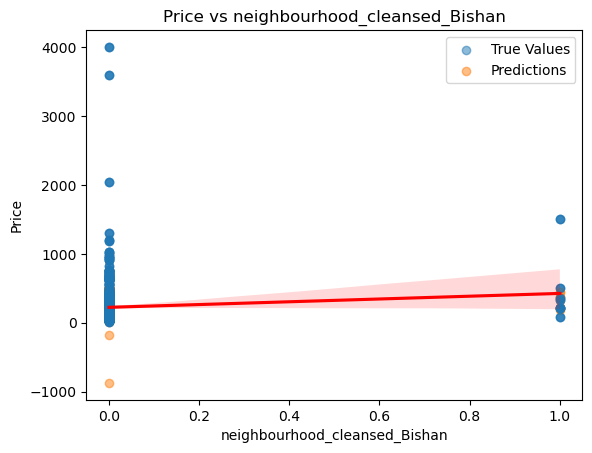

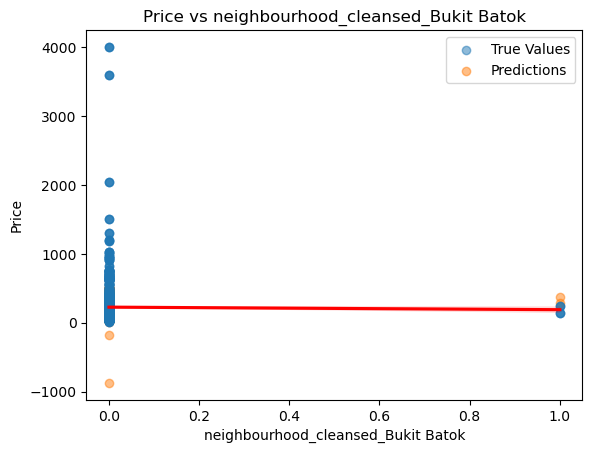

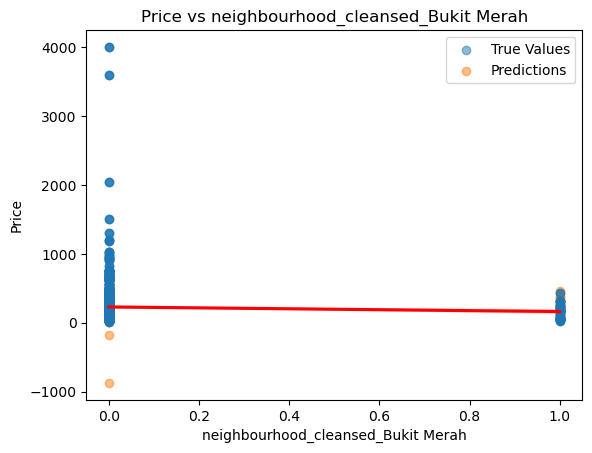

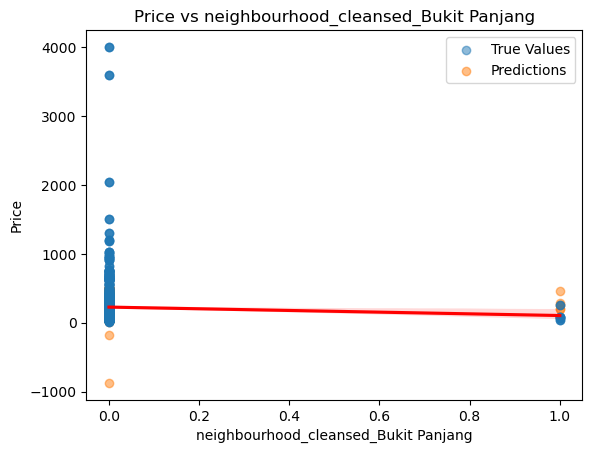

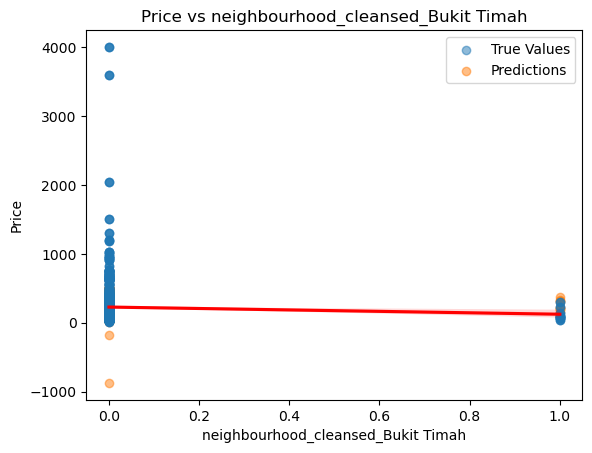

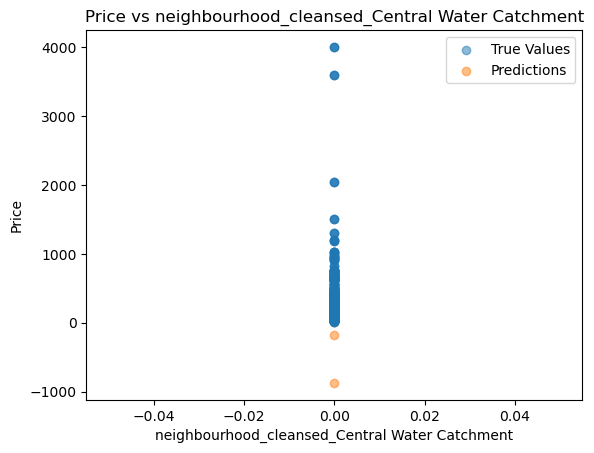

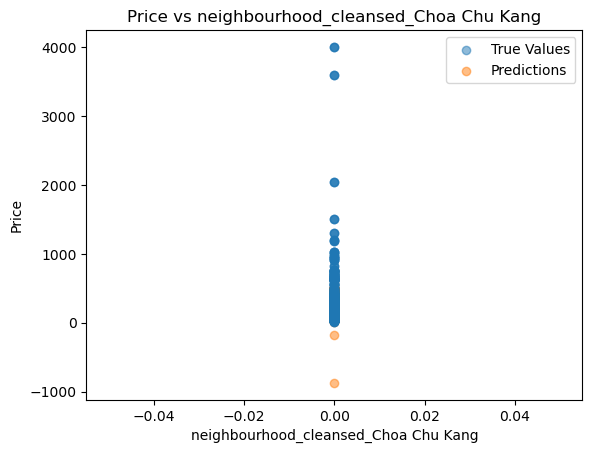

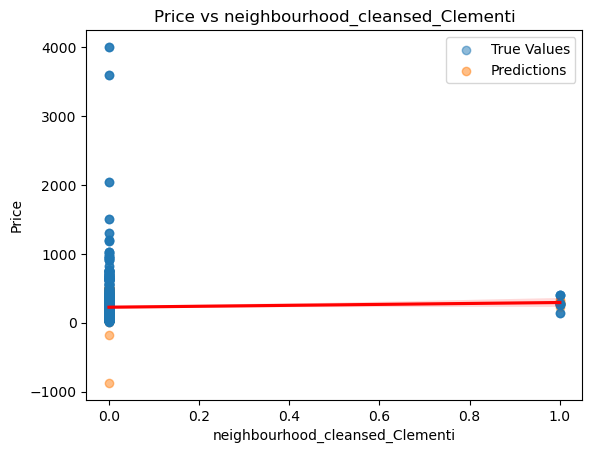

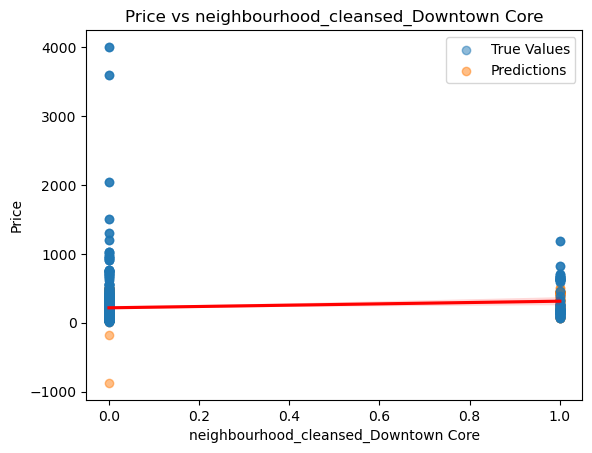

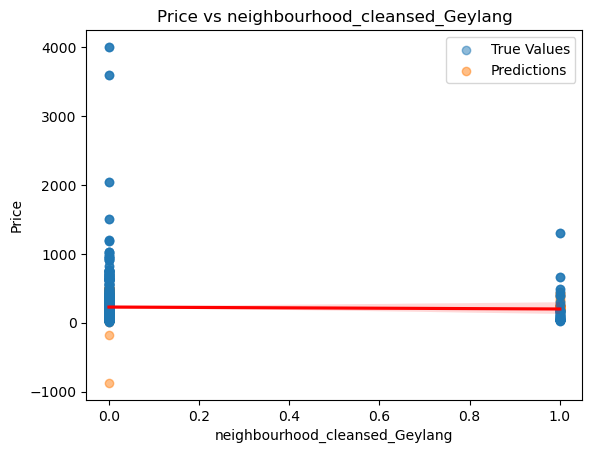

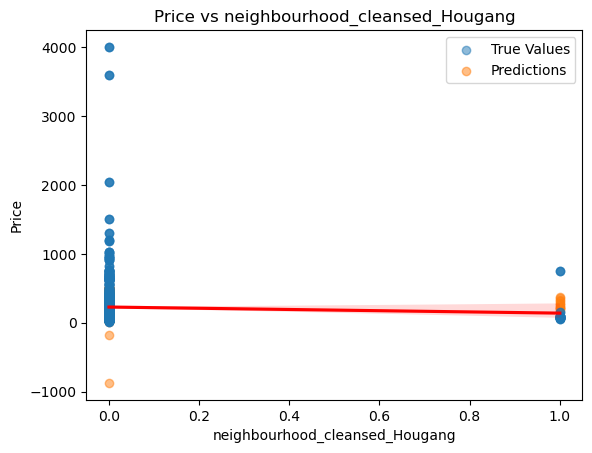

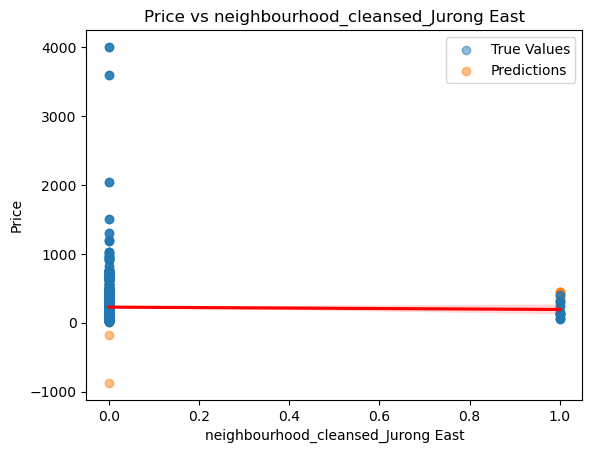

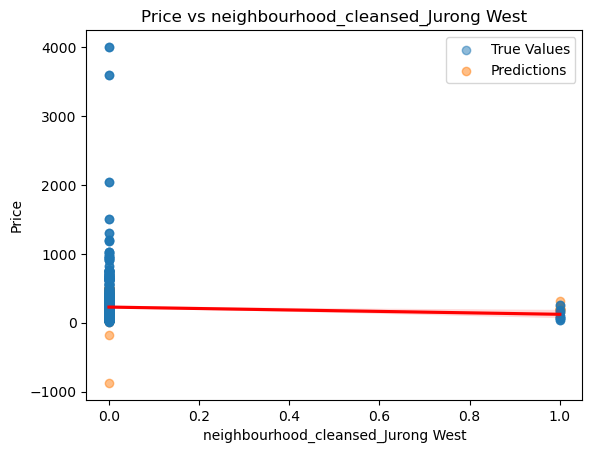

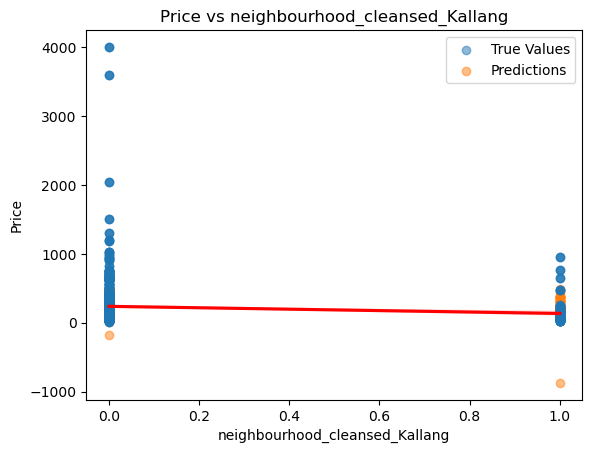

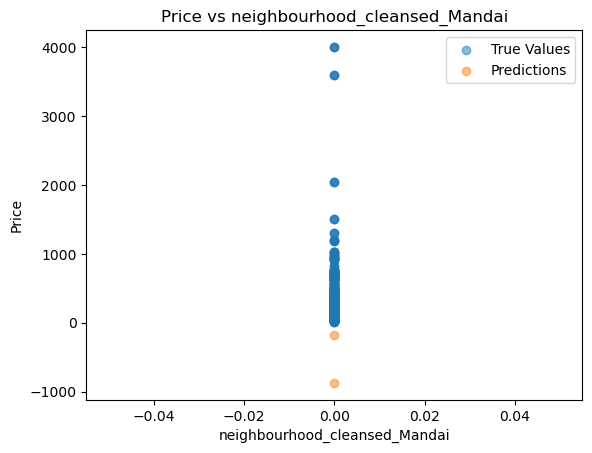

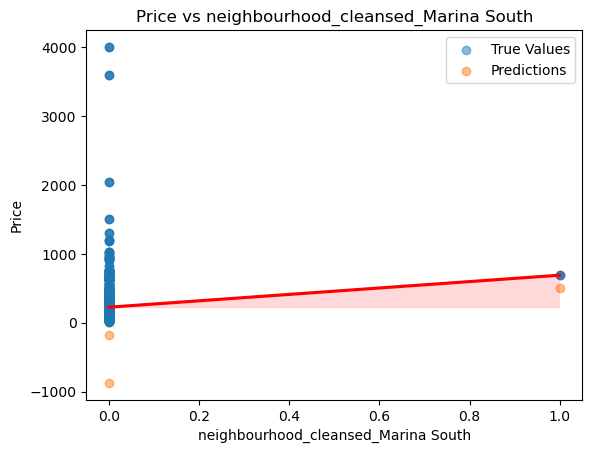

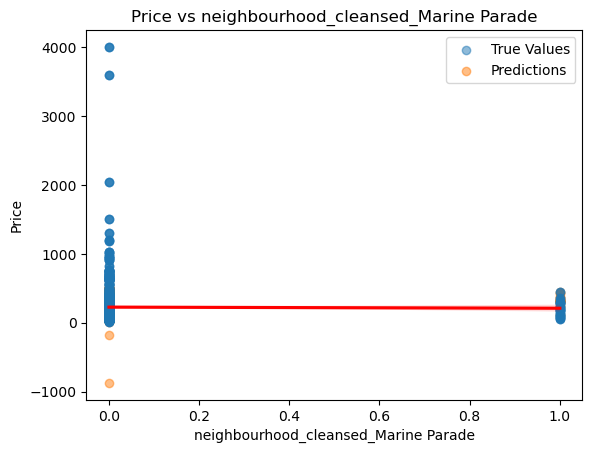

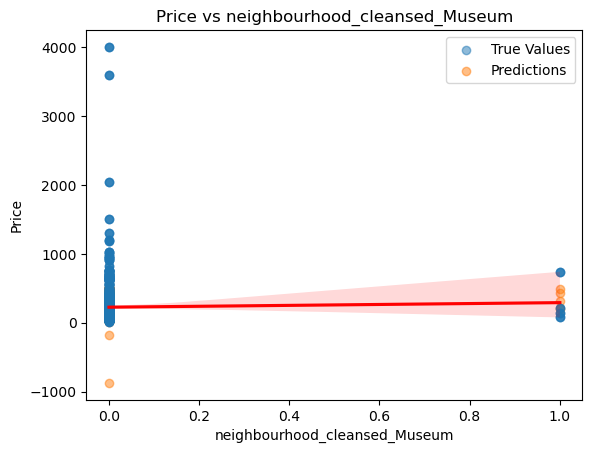

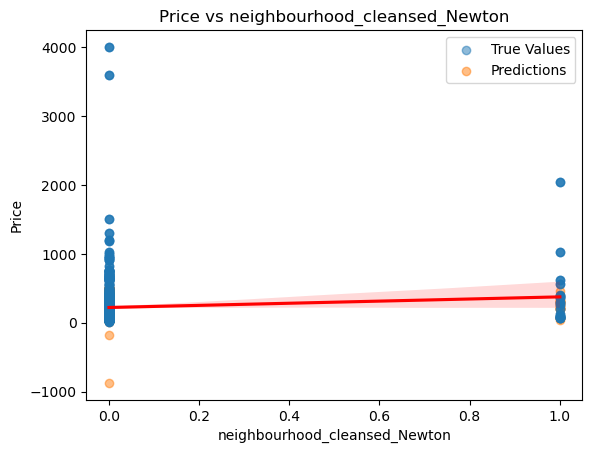

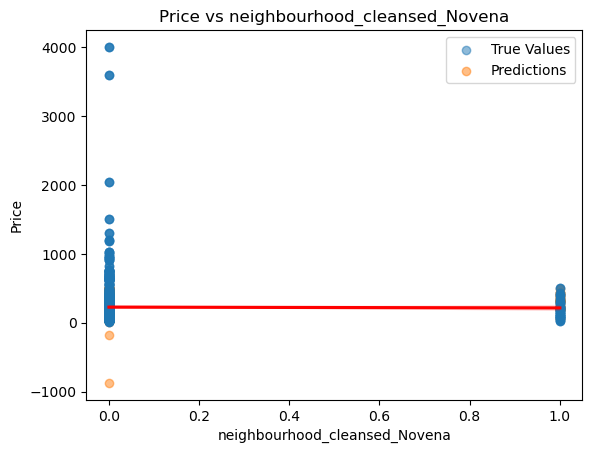

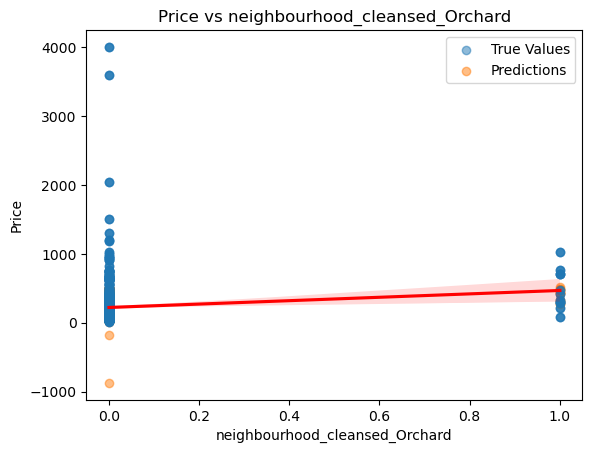

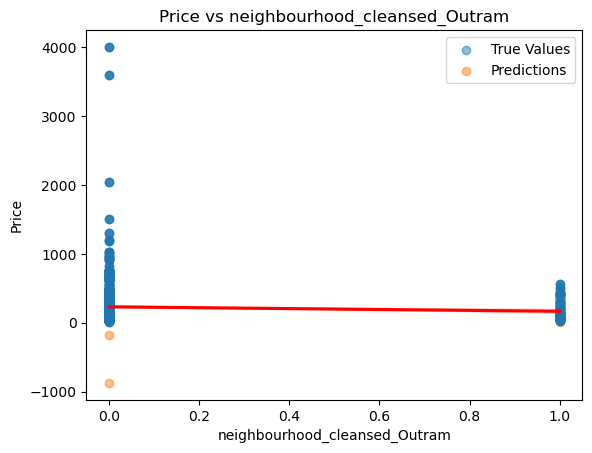

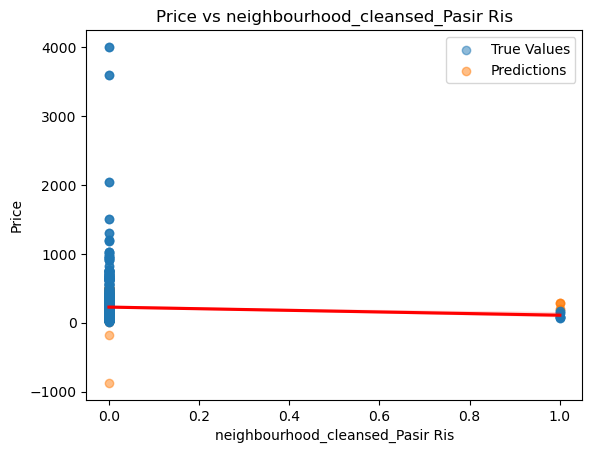

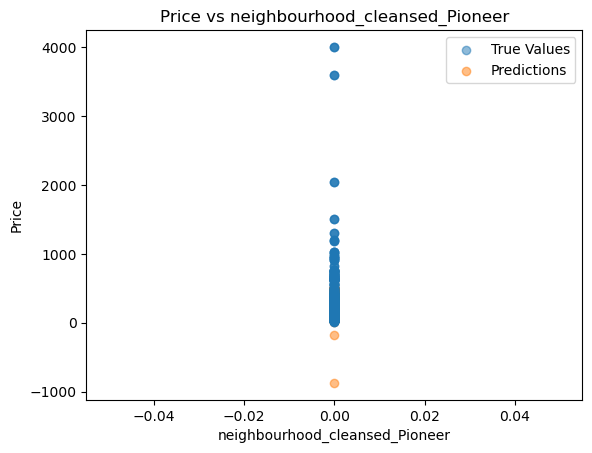

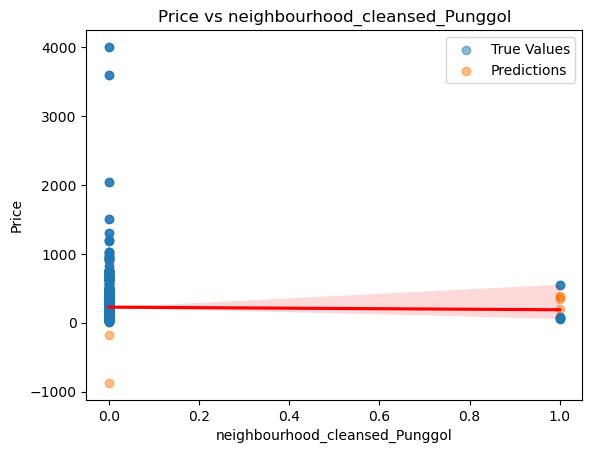

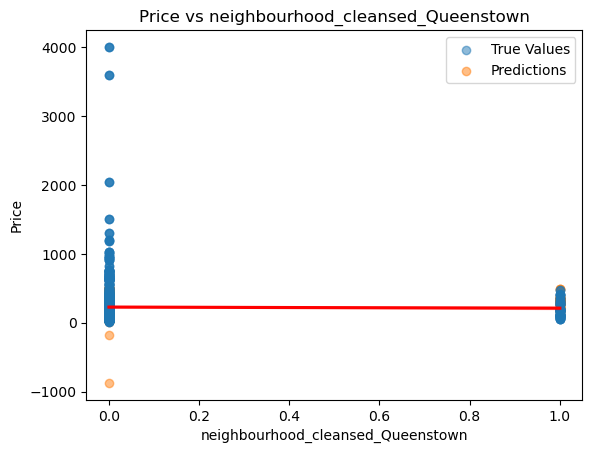

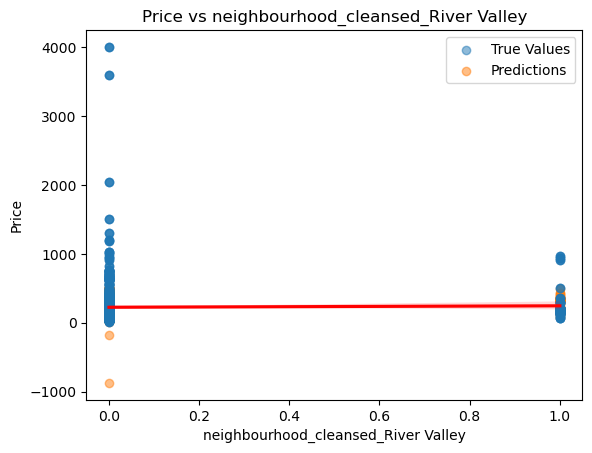

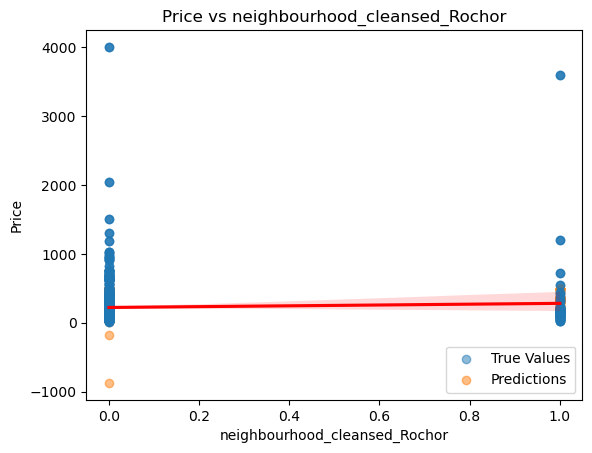

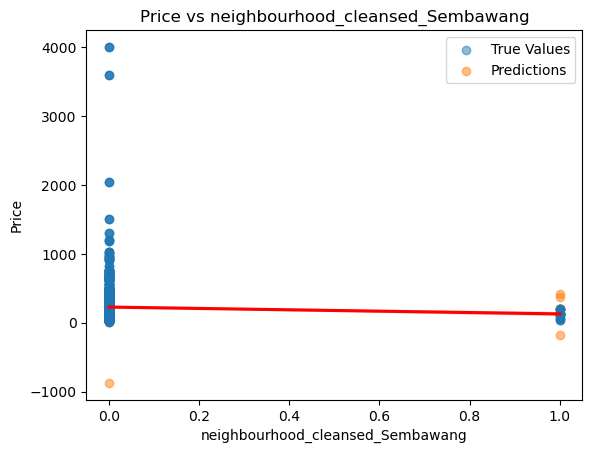

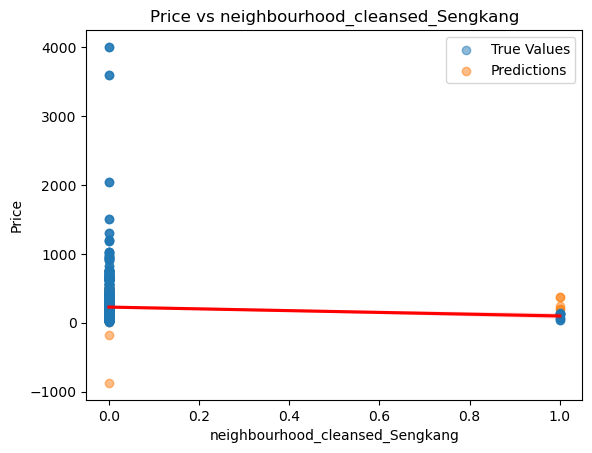

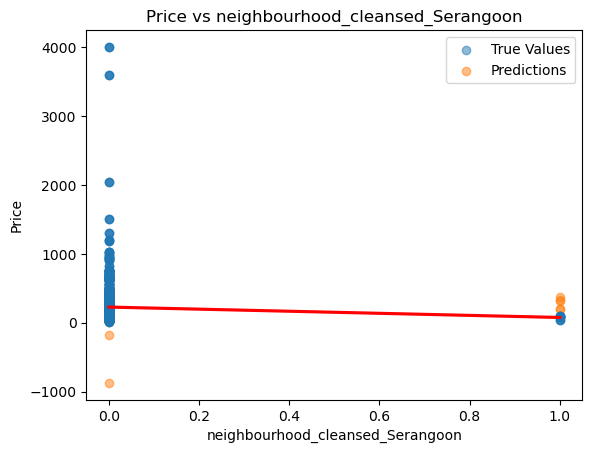

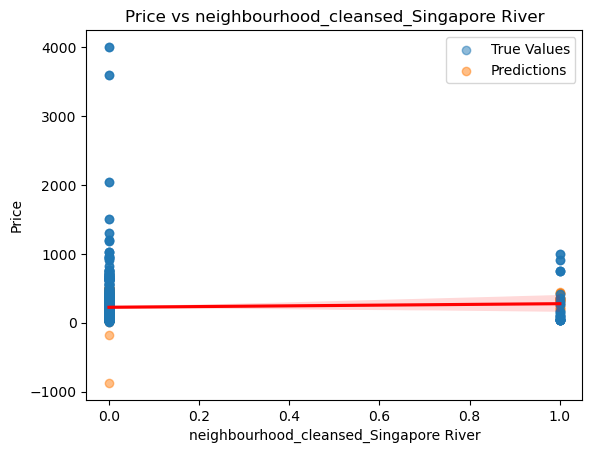

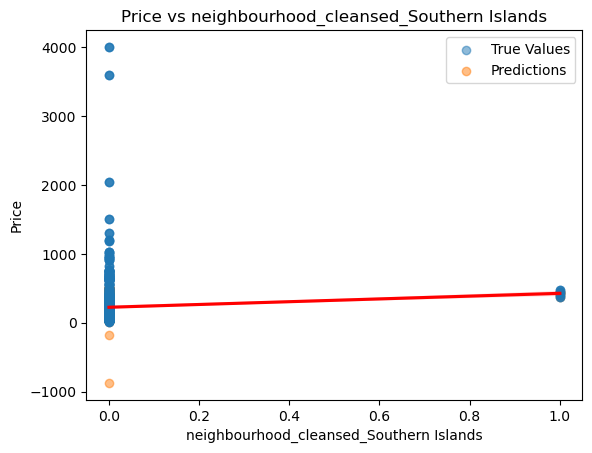

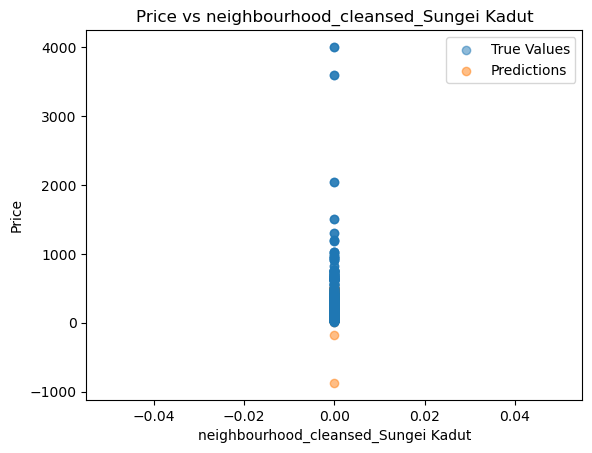

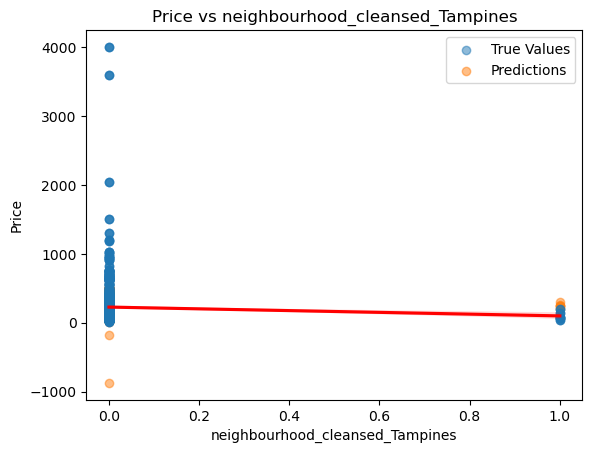

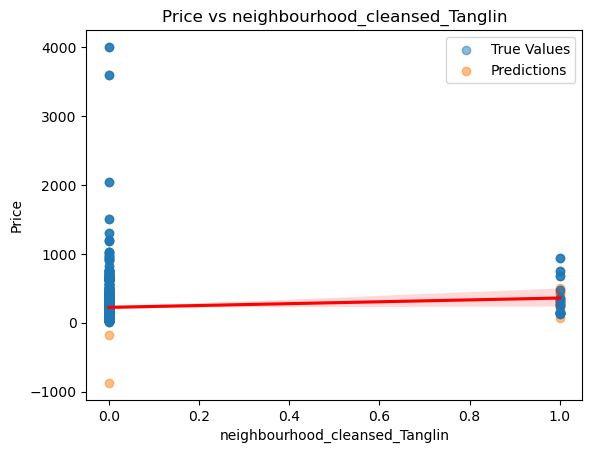

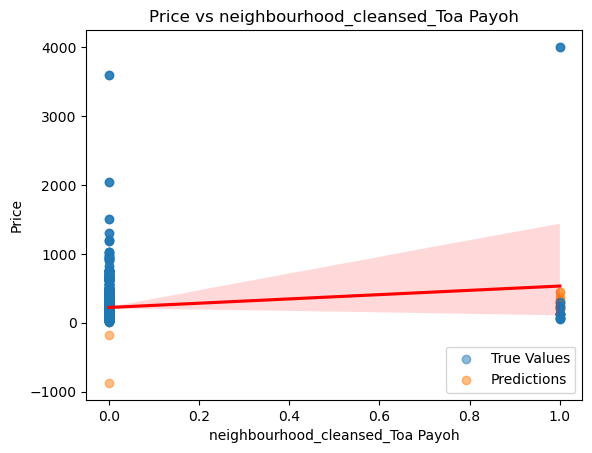

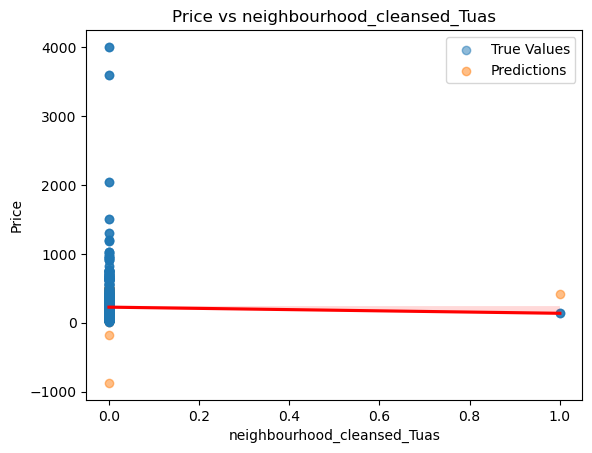

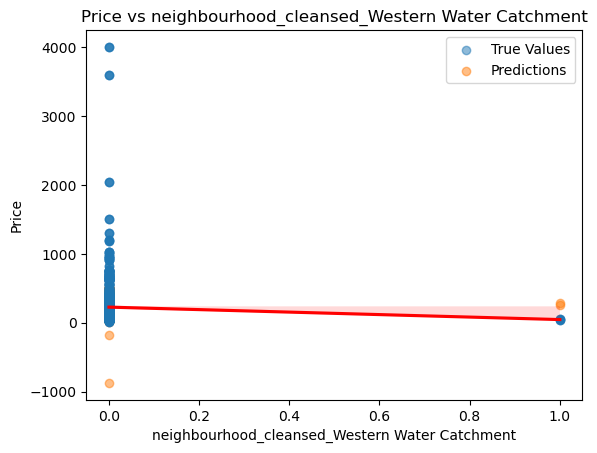

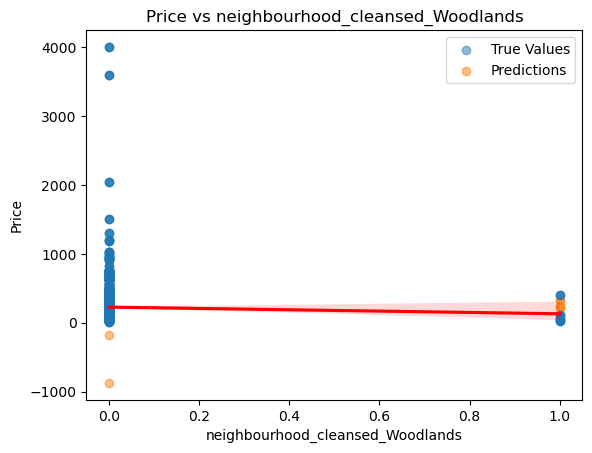

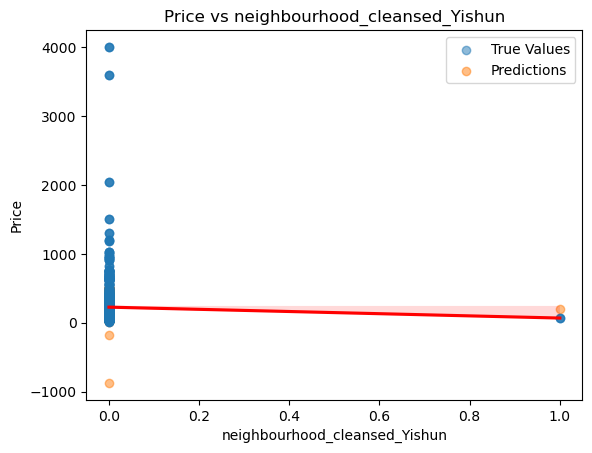

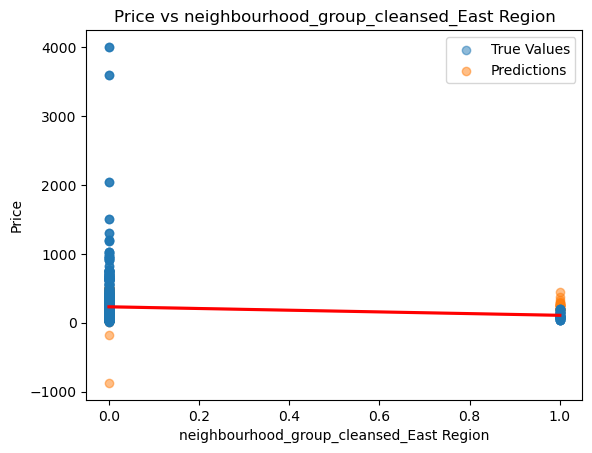

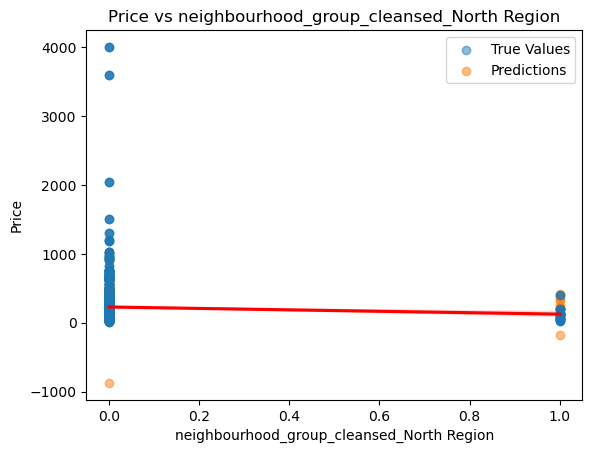

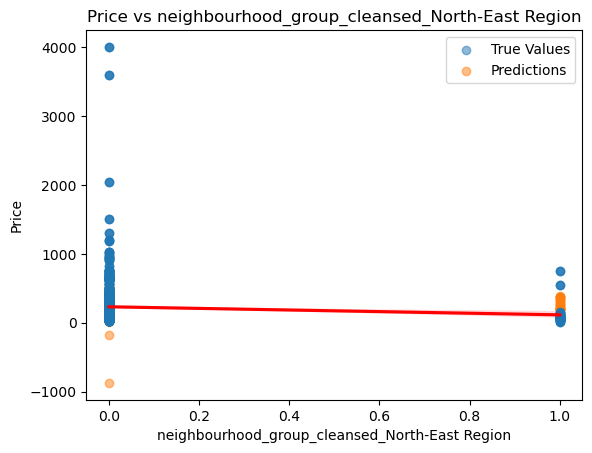

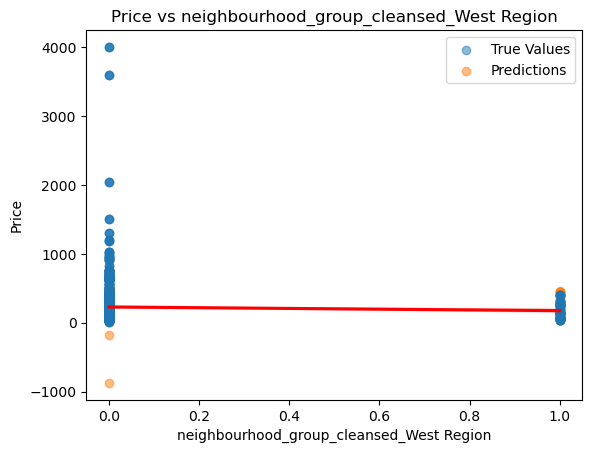

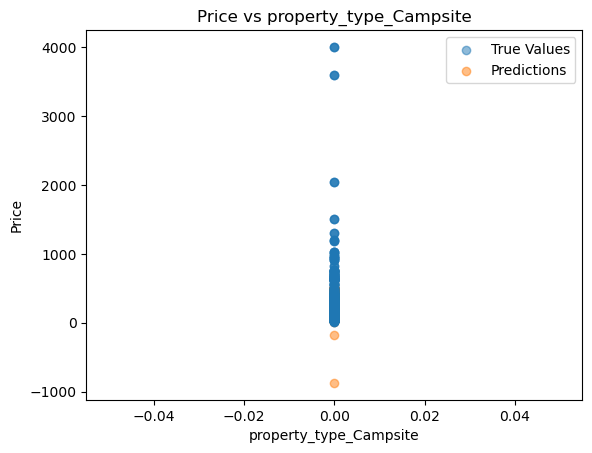

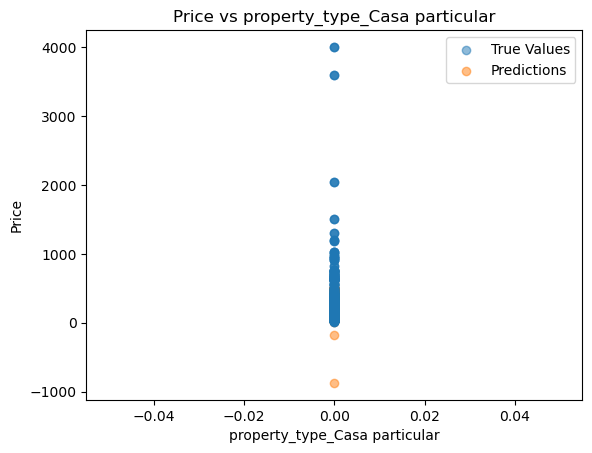

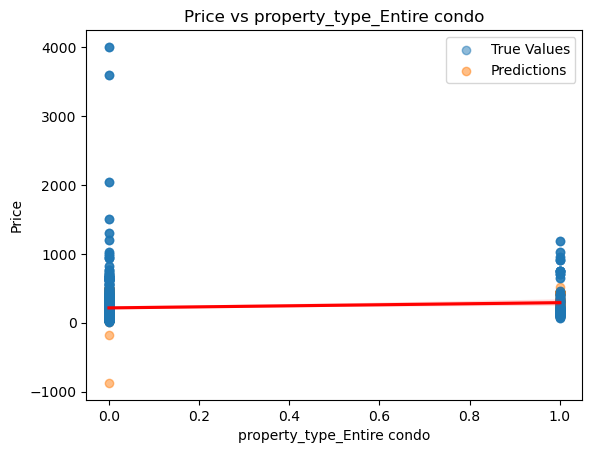

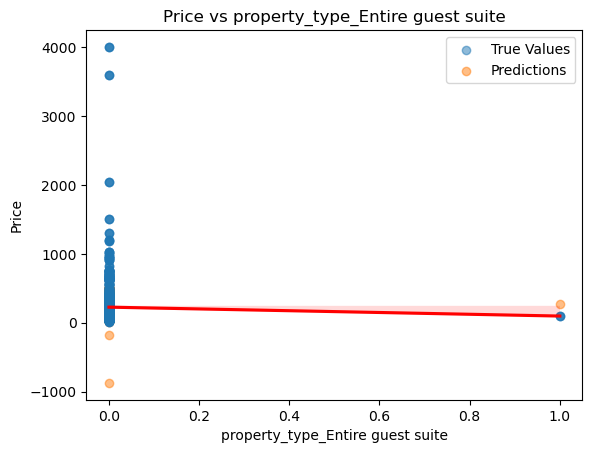

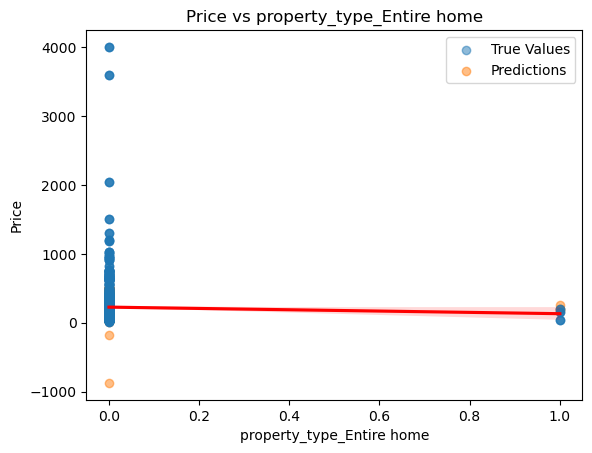

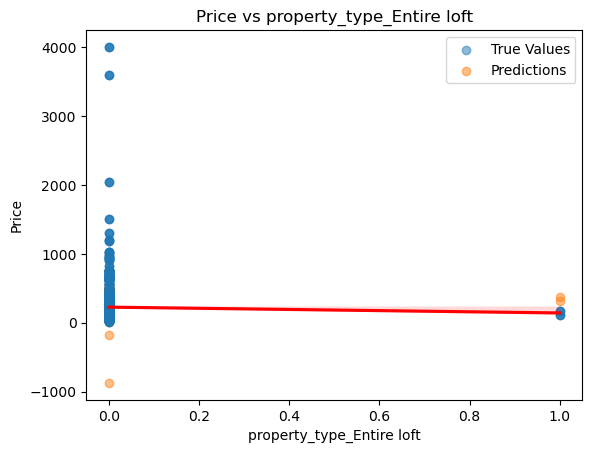

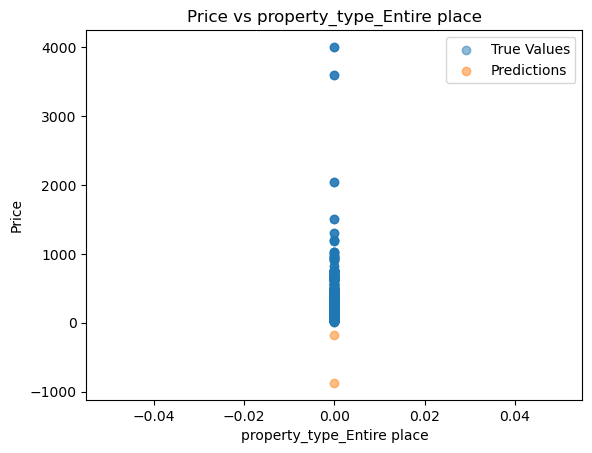

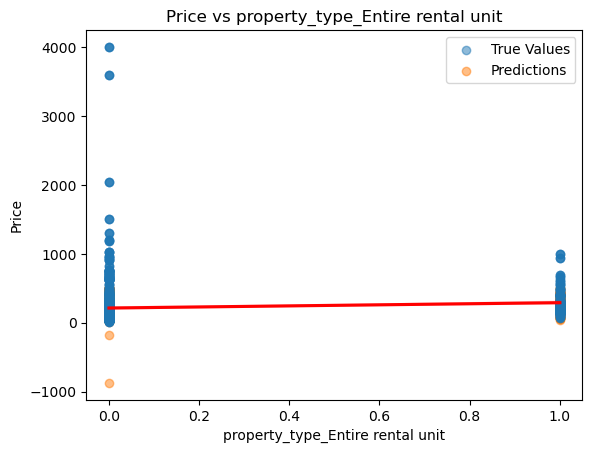

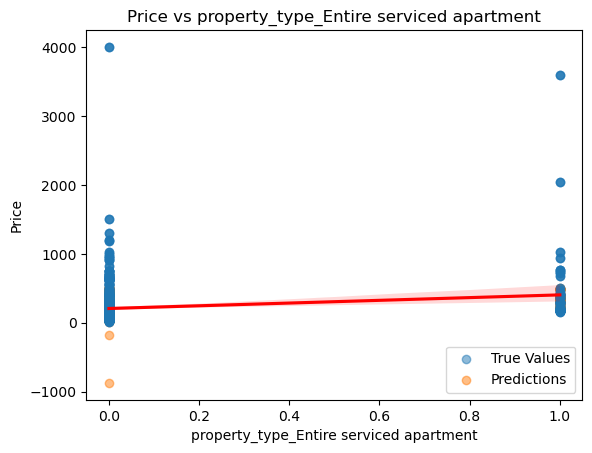

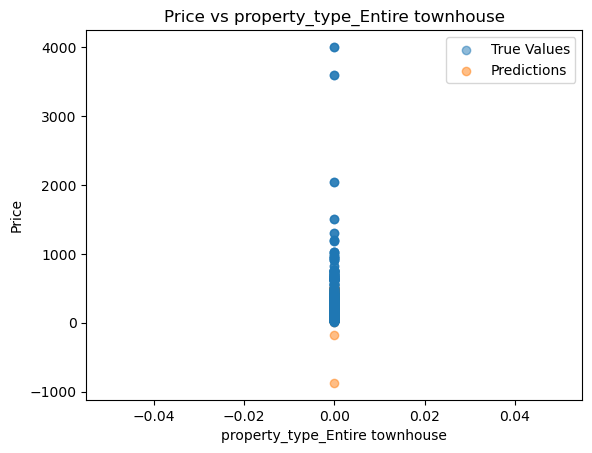

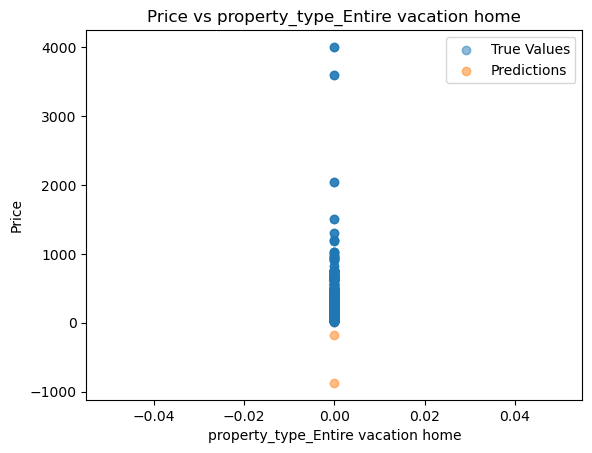

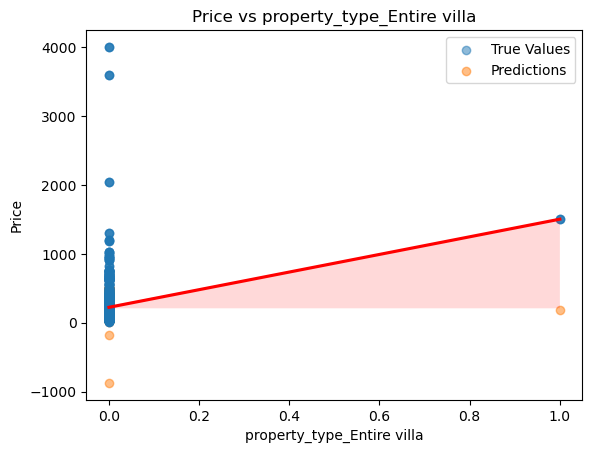

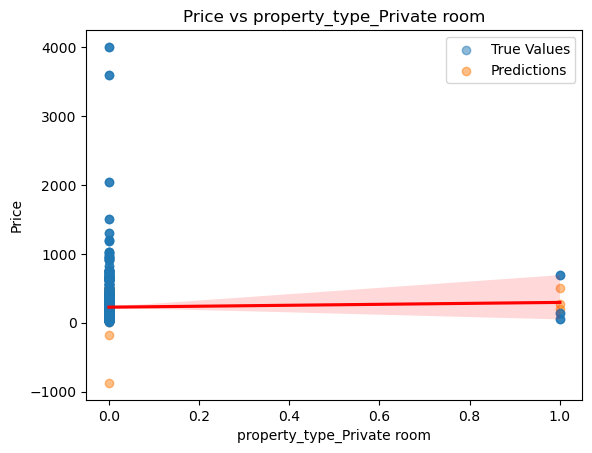

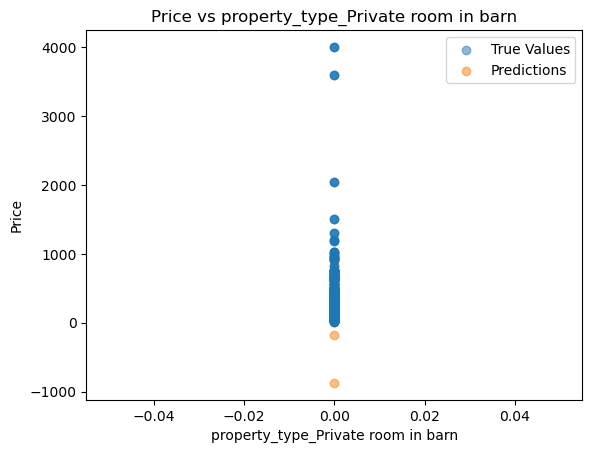

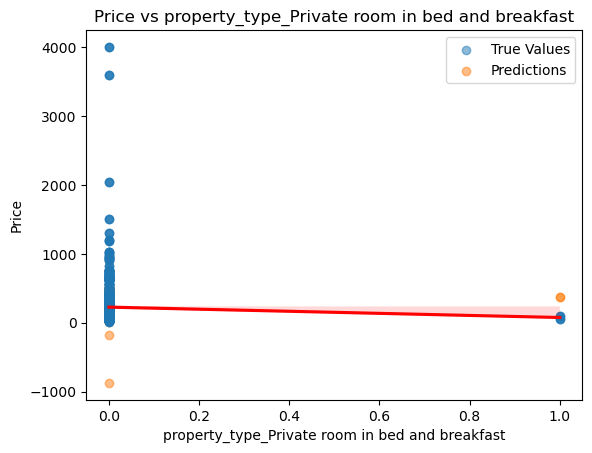

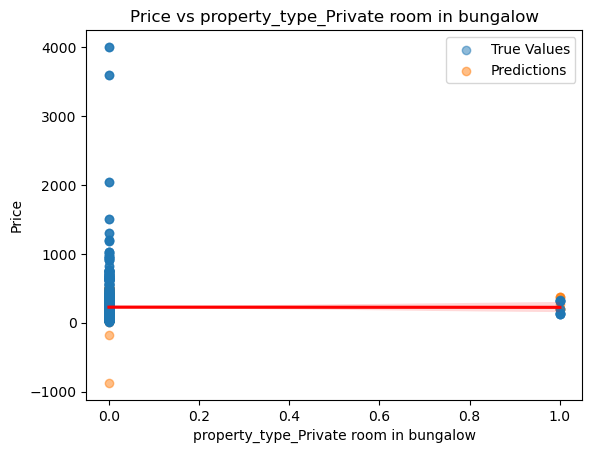

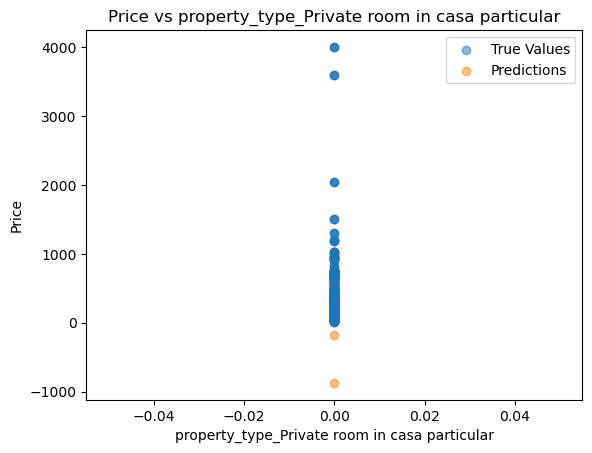

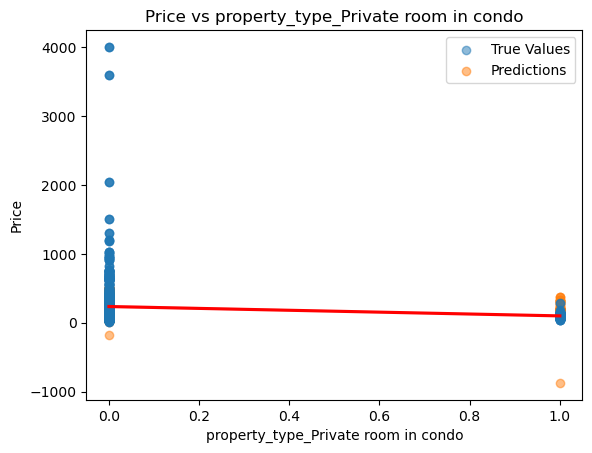

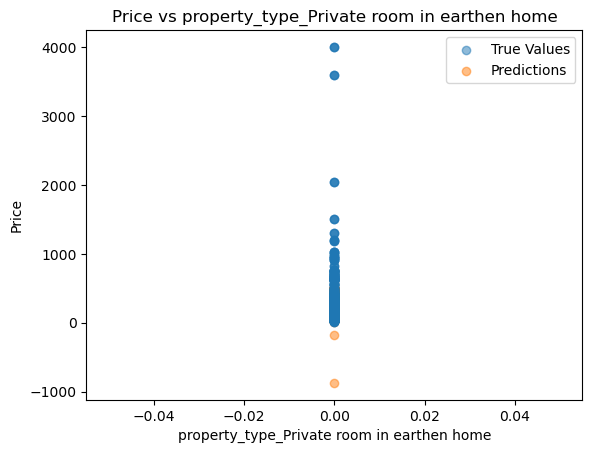

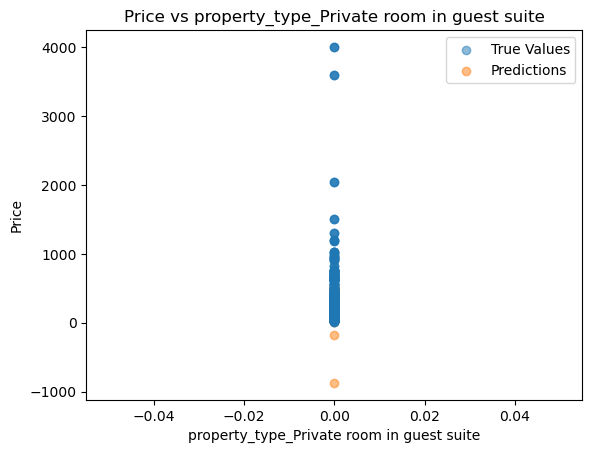

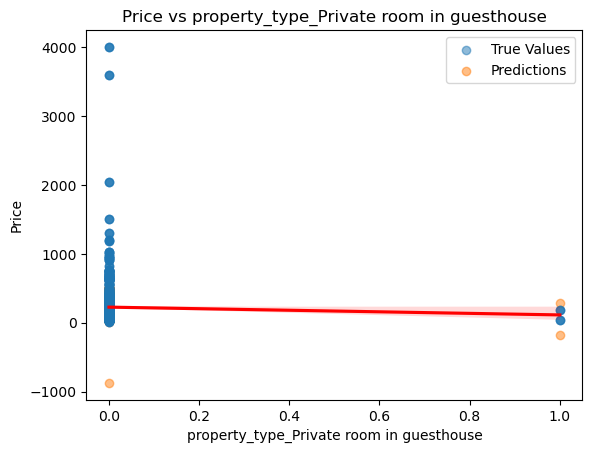

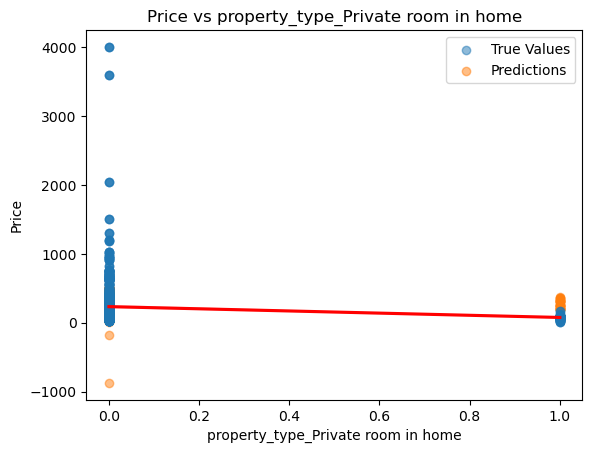

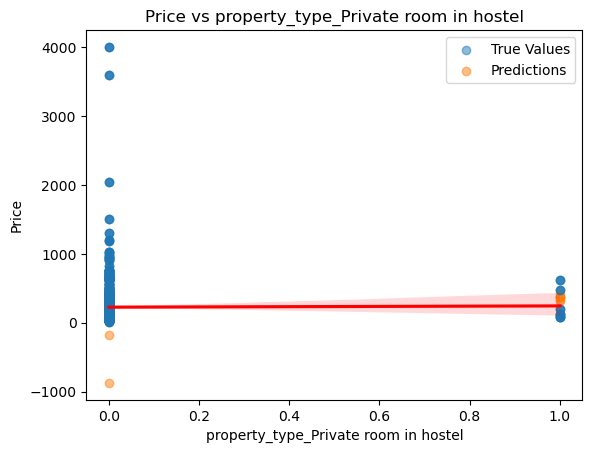

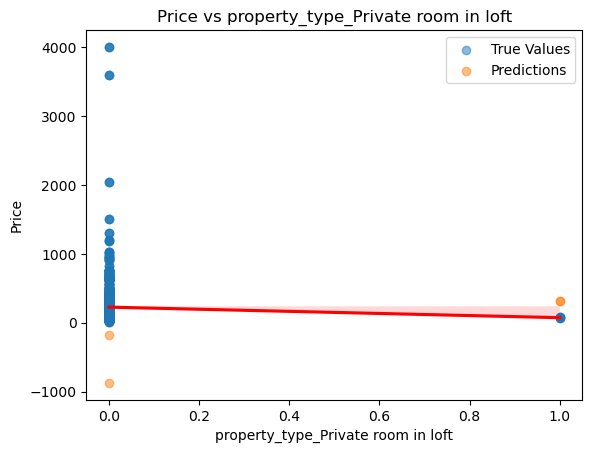

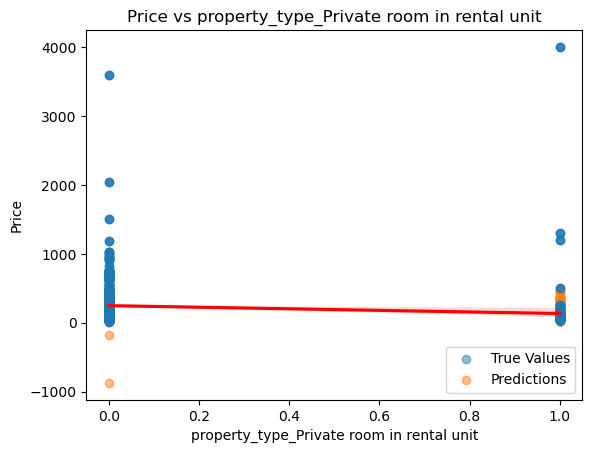

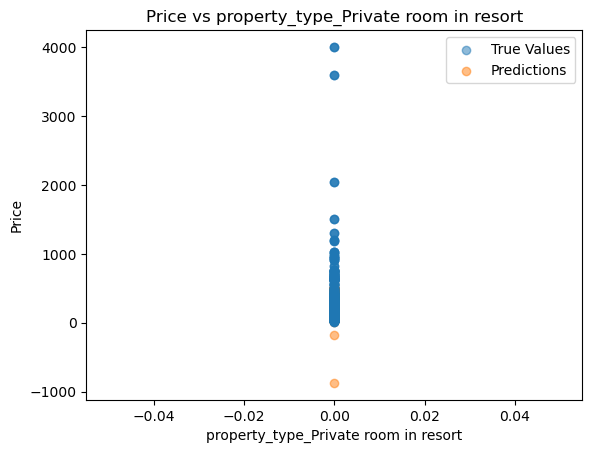

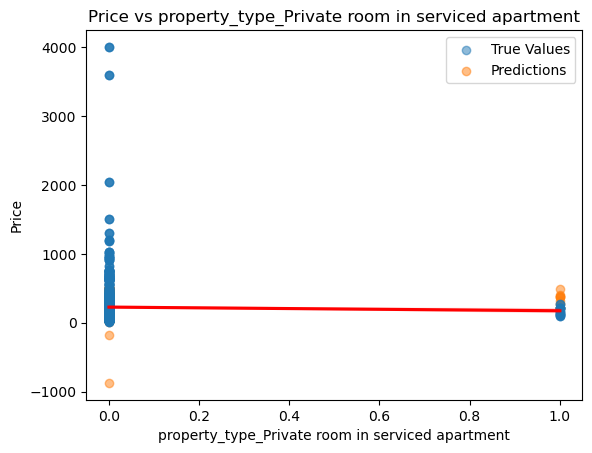

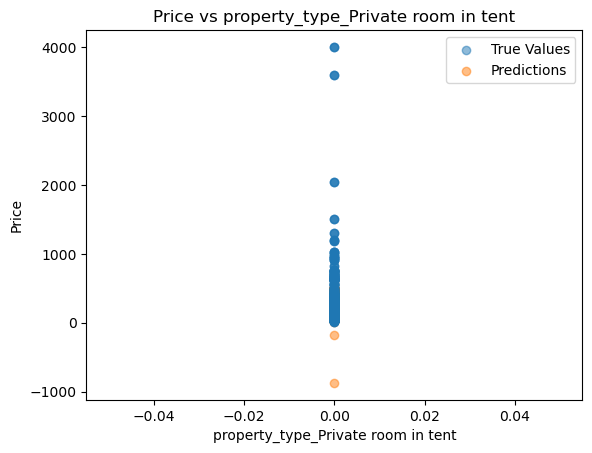

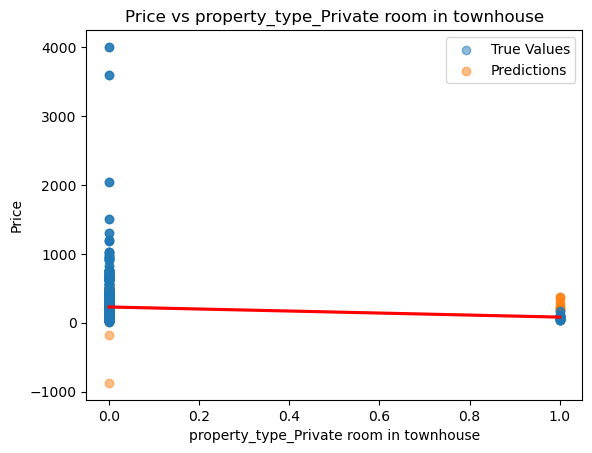

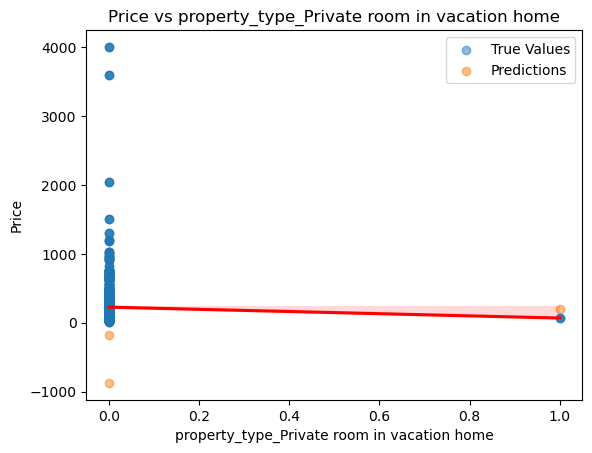

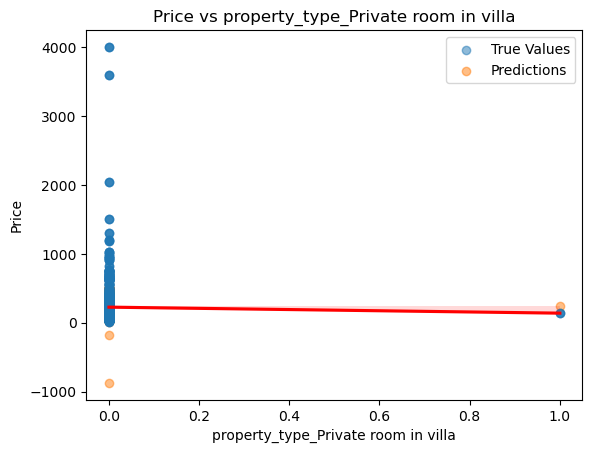

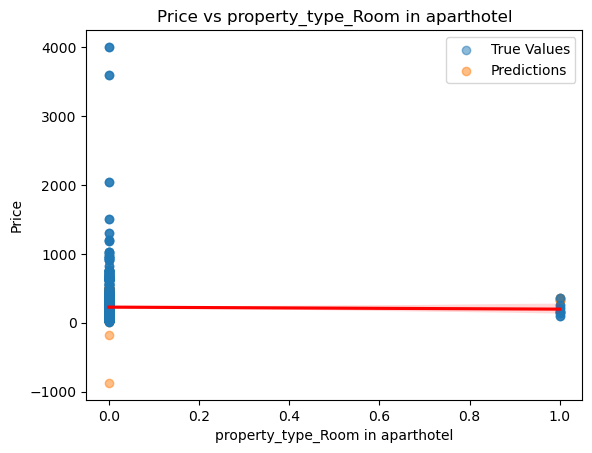

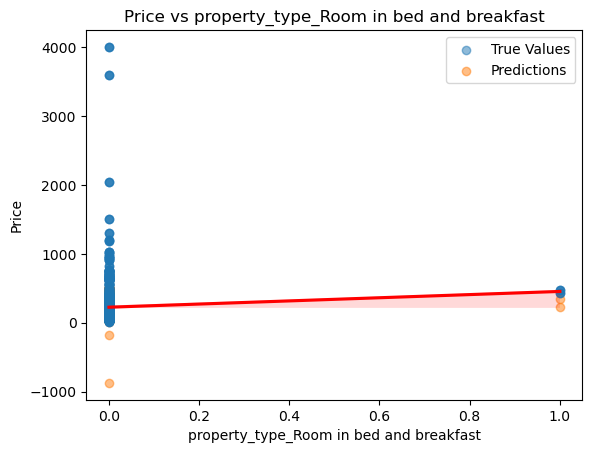

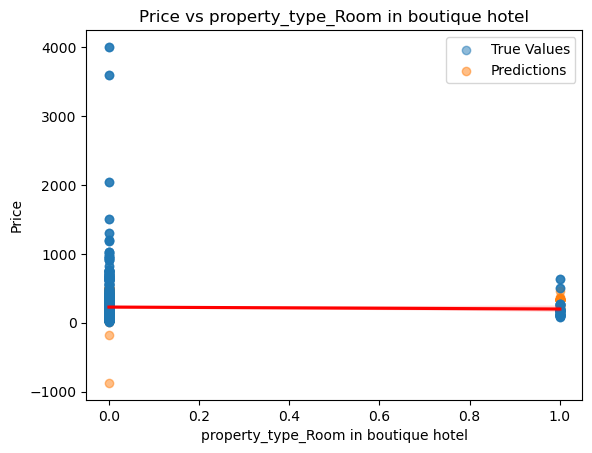

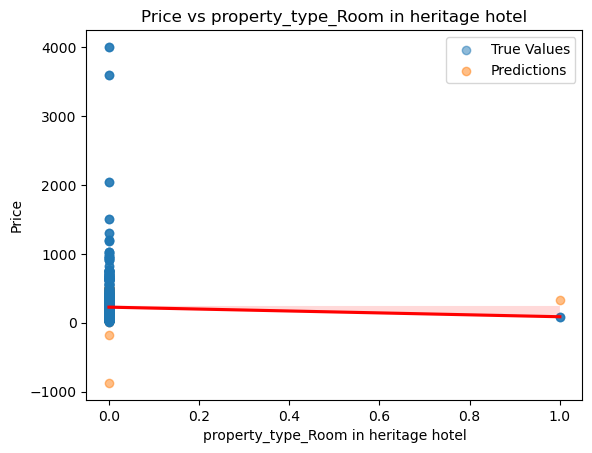

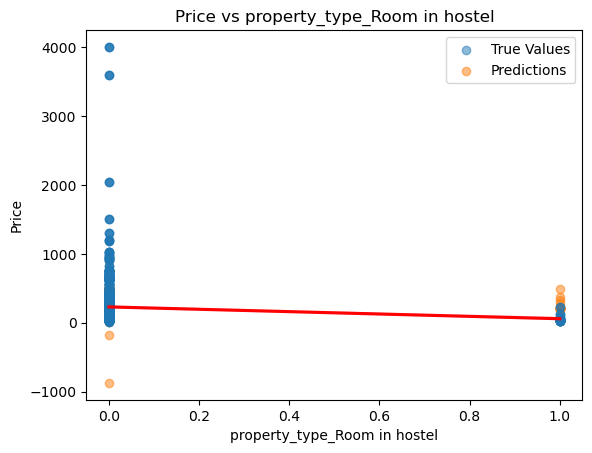

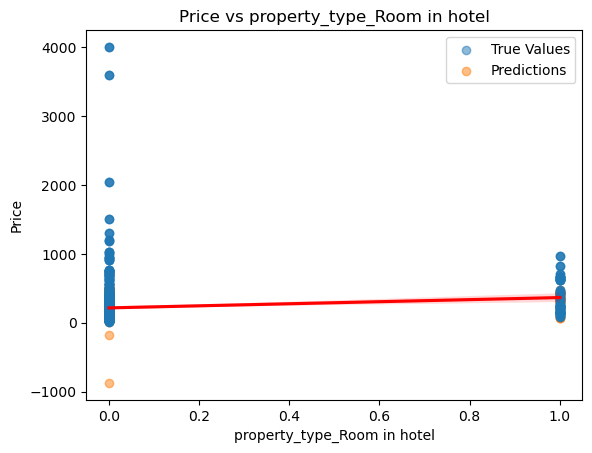

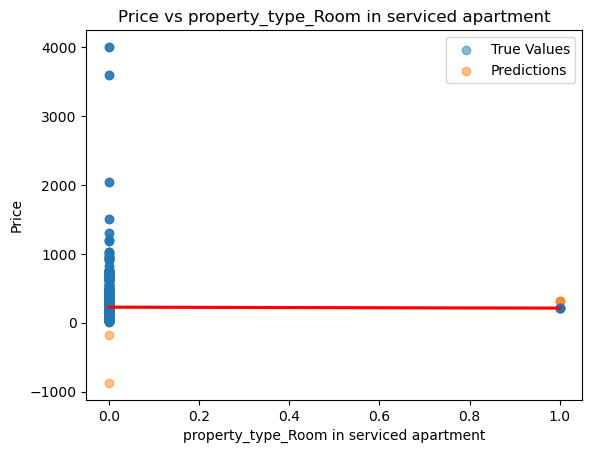

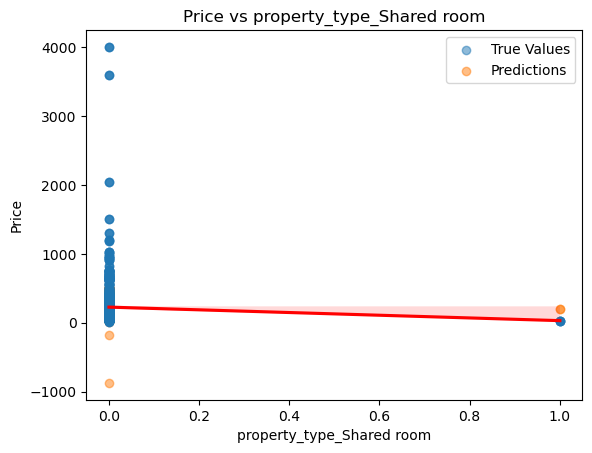

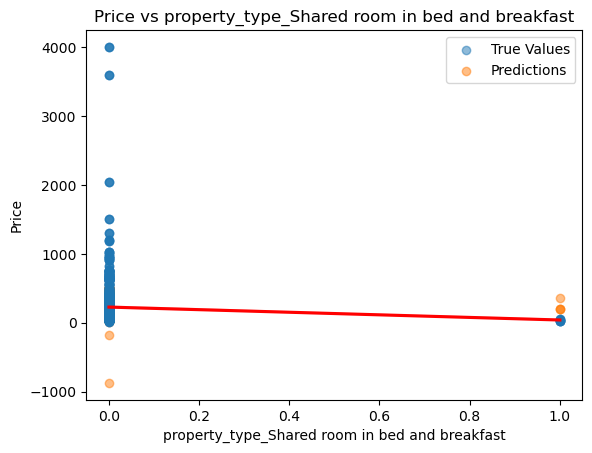

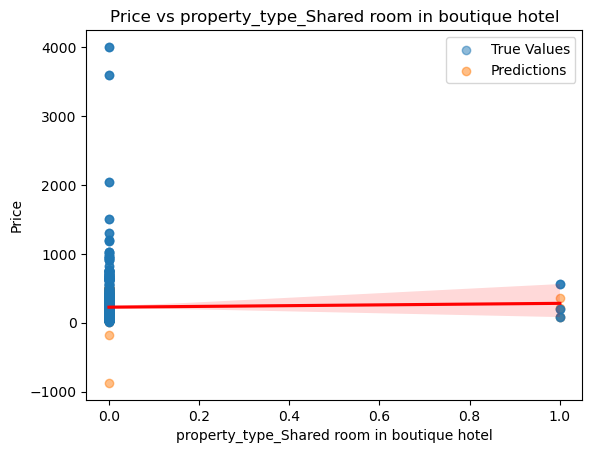

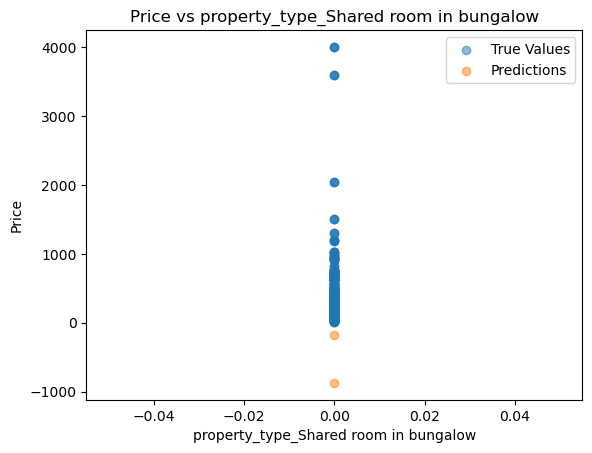

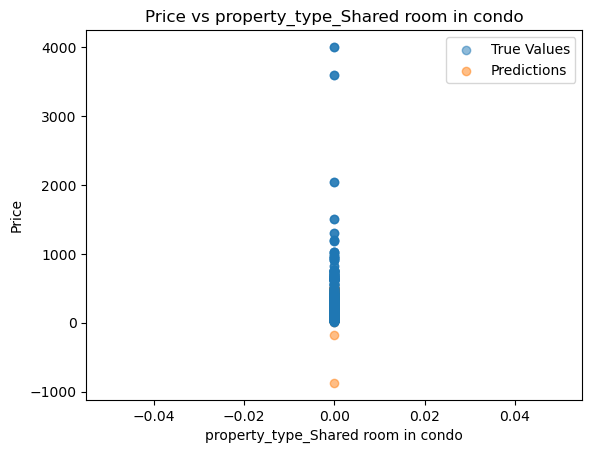

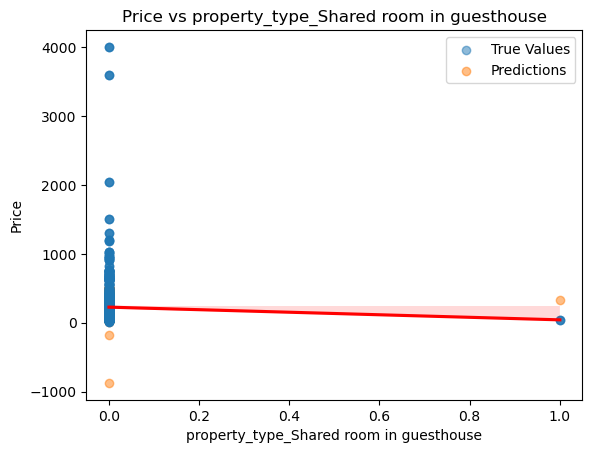

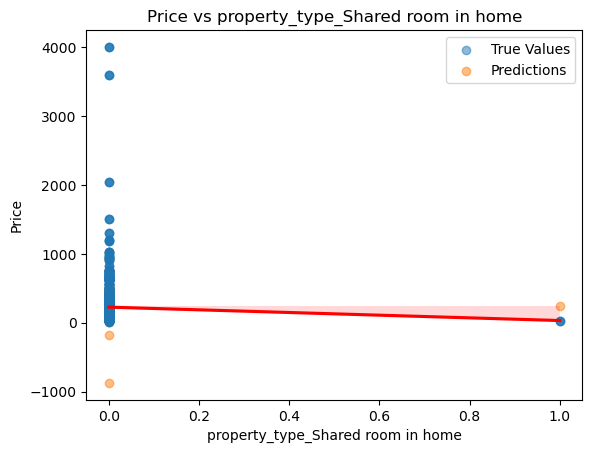

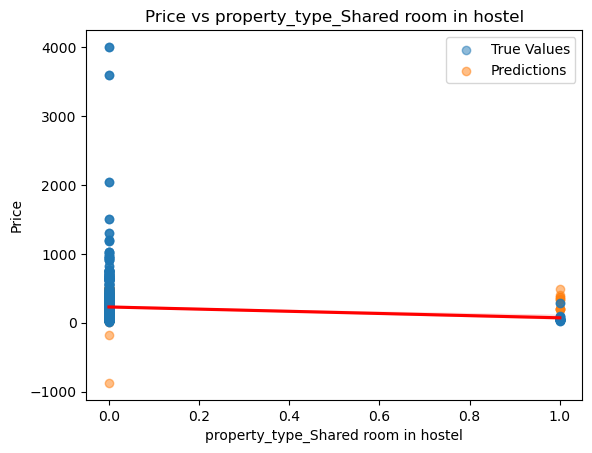

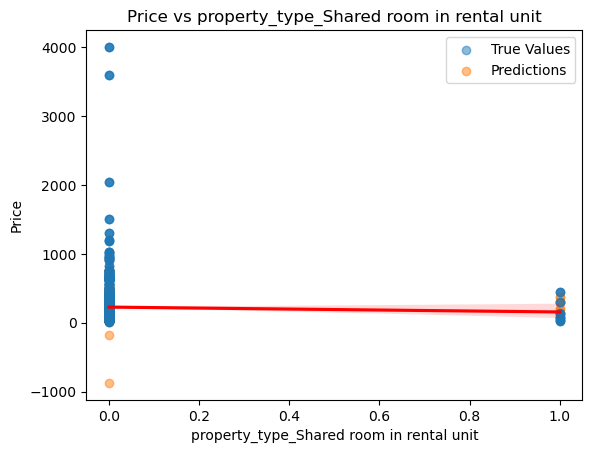

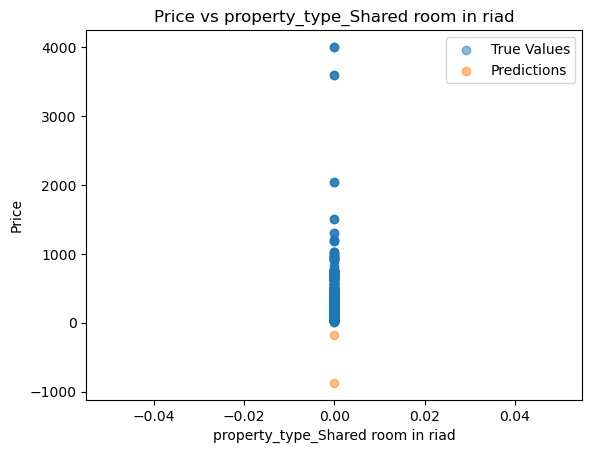

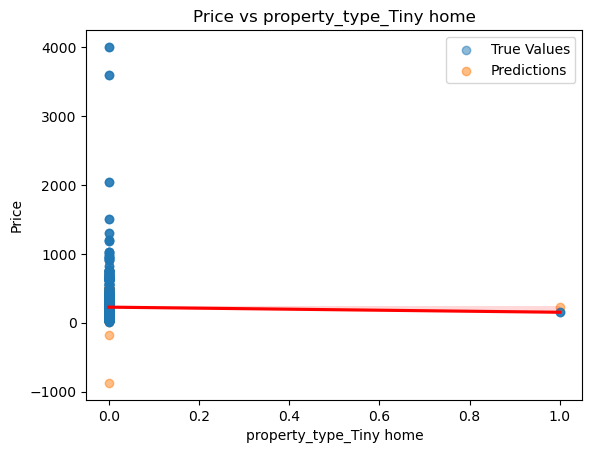

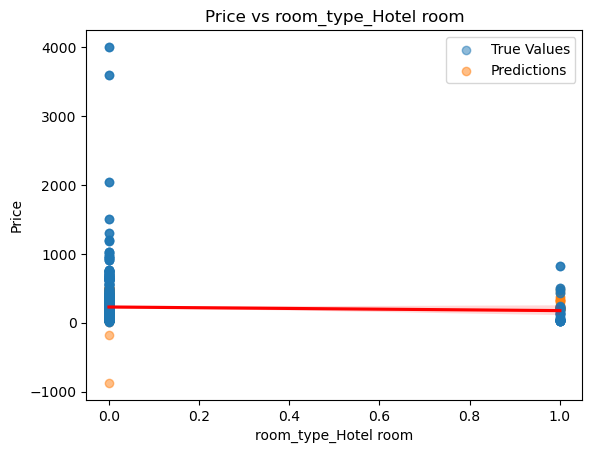

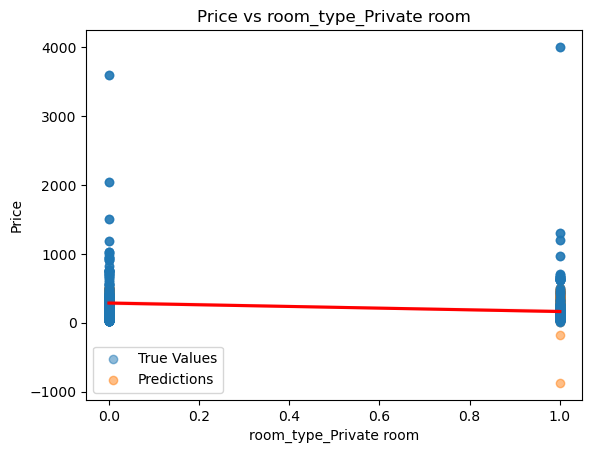

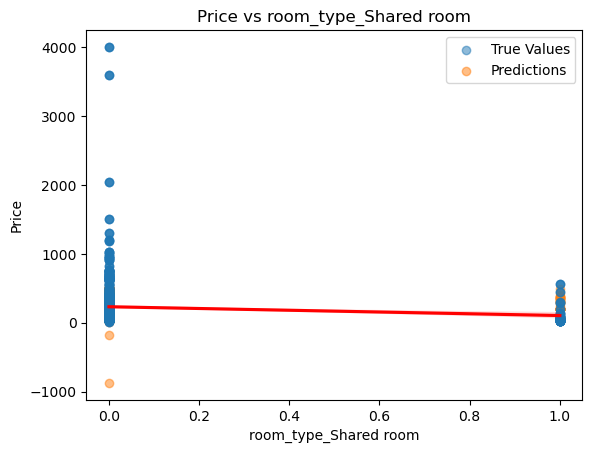

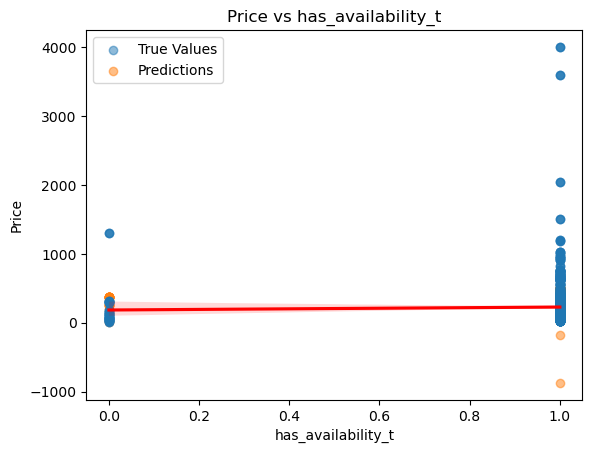

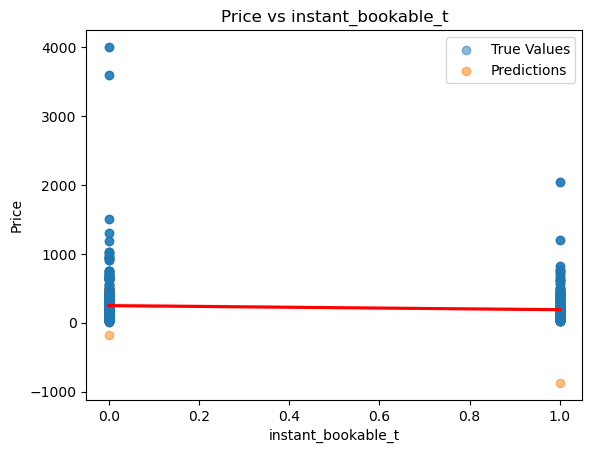

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# For each numeric feature in the dataset
for feature in X_numeric.columns:
    # Create a scatter plot of the true values (y_test) and the predicted values (y_pred)
    plt.scatter(X_test[feature], y_test, label='True Values', alpha=0.5)
    plt.scatter(X_test[feature], y_pred, label='Predictions', alpha=0.5)
    
    # Fit a line to the data using seaborn's regplot
    sns.regplot(x=X_test[feature], y=y_test, line_kws={"color": "red"})
    
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Price vs {feature}")
    plt.legend()
    
    # Display the plot
    plt.show()

##### General comment

##### From the above linear regression plot and high_correlations_price.csv, We are able to identify that there are 23 variables that are > 0.01. // require more explanation